<a href="https://colab.research.google.com/github/Neuron-Automation/for-git-study/blob/master/DEEP_NEURAL_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NEURON AUTOMATION, TASK SOLVED

In [1]:
"""
REDES NEURONALES PROFUNDAS DESDE CERO
=====================================

Objetivos:
- Expandir implementación de redes neuronales a arquitecturas flexibles
- Crear sistema modular con clases para cada componente
- Implementar funciones de activación avanzadas (ReLU)
- Usar métodos de inicialización avanzados (Xavier, He)
- Implementar optimizadores adaptativos (AdaGrad)
- Construir redes de cualquier profundidad y configuración

Sprint: Deep Learning Architecture Design
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("="*80)
print("REDES NEURONALES PROFUNDAS DESDE CERO")
print("Arquitectura Modular y Componentes Avanzados")
print("="*80)


REDES NEURONALES PROFUNDAS DESDE CERO
Arquitectura Modular y Componentes Avanzados


In [ ]:
# ============================================================================
# 1. FUNDAMENTOS DE DEEP LEARNING MODULAR
# ============================================================================

print("📚 1. FUNDAMENTOS DE DEEP LEARNING MODULAR")
print("="*45)

print("""
🏗️ ARQUITECTURA MODULAR:
────────────────────────

📊 CONCEPTO CENTRAL:
   • Cada componente como clase independiente
   • Fácil intercambiabilidad de elementos
   • Escalabilidad a redes de cualquier profundidad
   • Mantenibilidad y extensibilidad mejoradas

🧱 COMPONENTES MODULARES:

   🔸 CAPAS (Layers):
      • FC (Fully Connected) - Capa densa
      • Convolutional (futuro) - Para CNNs
      • Recurrent (futuro) - Para RNNs

   🔸 FUNCIONES DE ACTIVACIÓN:
      • Sigmoid: σ(x) = 1/(1 + e^(-x))
      • Tanh: tanh(x) = (e^x - e^(-x))/(e^x + e^(-x))
      • ReLU: f(x) = max(0, x) ← ¡Nuevo!
      • Softmax: Para clasificación multiclase

   🔸 INICIALIZADORES:
      • Simple: Distribución gaussiana σ = 0.01
      • Xavier: σ = √(1/n) ← Para sigmoid/tanh
      • He: σ = √(2/n) ← Para ReLU

   🔸 OPTIMIZADORES:
      • SGD: Gradient Descent clásico
      • AdaGrad: Adaptativo con historial ← ¡Nuevo!
      • Adam (futuro): Estado del arte
      • RMSprop (futuro): Alternativa popular

🎯 VENTAJAS DEL DISEÑO MODULAR:
   • Experimentación rápida con configuraciones
   • Debugging más fácil por componente
   • Reutilización de código
   • Extensibilidad sin refactoring completo
   • Separation of concerns

🔬 FORWARD PROPAGATION MODULAR:
   A₁ = FC₁.forward(X)
   Z₁ = Activation₁.forward(A₁)
   A₂ = FC₂.forward(Z₁)
   Z₂ = Activation₂.forward(A₂)
   ...

🔄 BACKWARD PROPAGATION MODULAR:
   dA₃ = Activation₃.backward(Z₃, Y)
   dZ₂ = FC₃.backward(dA₃)
   dA₂ = Activation₂.backward(dZ₂)
   dZ₁ = FC₂.backward(dA₂)
   ...

⚡ OPTIMIZACIÓN ADAPTATIVA:
   • Cada parámetro tiene learning rate individual
   • Se adapta basado en historial de gradientes
   • Convergencia más rápida y estable
   • Menor sensibilidad a hiperparámetros
""")

print("✅ Fundamentos de arquitectura modular establecidos")


📚 1. FUNDAMENTOS DE DEEP LEARNING MODULAR

🏗️ ARQUITECTURA MODULAR:
────────────────────────

📊 CONCEPTO CENTRAL:
   • Cada componente como clase independiente
   • Fácil intercambiabilidad de elementos
   • Escalabilidad a redes de cualquier profundidad
   • Mantenibilidad y extensibilidad mejoradas

🧱 COMPONENTES MODULARES:
   
   🔸 CAPAS (Layers):
      • FC (Fully Connected) - Capa densa
      • Convolutional (futuro) - Para CNNs
      • Recurrent (futuro) - Para RNNs
   
   🔸 FUNCIONES DE ACTIVACIÓN:
      • Sigmoid: σ(x) = 1/(1 + e^(-x))
      • Tanh: tanh(x) = (e^x - e^(-x))/(e^x + e^(-x))
      • ReLU: f(x) = max(0, x) ← ¡Nuevo!
      • Softmax: Para clasificación multiclase
   
   🔸 INICIALIZADORES:
      • Simple: Distribución gaussiana σ = 0.01
      • Xavier: σ = √(1/n) ← Para sigmoid/tanh
      • He: σ = √(2/n) ← Para ReLU
   
   🔸 OPTIMIZADORES:
      • SGD: Gradient Descent clásico
      • AdaGrad: Adaptativo con historial ← ¡Nuevo!
      • Adam (futuro): Estado del arte

In [ ]:
# ============================================================================
# 2. DATASET MNIST PREPARATION
# ============================================================================

print("\n📊 2. PREPARACIÓN DEL DATASET MNIST")
print("="*40)

# Cargar MNIST
print("🔽 CARGANDO DATASET MNIST:")
try:
    from tensorflow.keras.datasets import mnist
    (X_train_original, y_train_original), (X_test_original, y_test_original) = mnist.load_data()
    print("   ✅ MNIST cargado desde Keras/TensorFlow")
except ImportError:
    print("   ⚠️ Generando datos sintéticos...")
    np.random.seed(42)
    X_train_original = np.random.randint(0, 256, (60000, 28, 28), dtype=np.uint8)
    y_train_original = np.random.randint(0, 10, 60000)
    X_test_original = np.random.randint(0, 256, (10000, 28, 28), dtype=np.uint8)
    y_test_original = np.random.randint(0, 10, 10000)
    print("   ✅ Datos sintéticos generados")

# Preprocesamiento
print(f"\n🔧 PREPROCESAMIENTO:")

# Flatten y normalización
X_train_flat = X_train_original.reshape(-1, 784).astype(np.float32) / 255.0
X_test_flat = X_test_original.reshape(-1, 784).astype(np.float32) / 255.0

# One-hot encoding (compatible con versiones nuevas y antiguas)
try:
    # Para versiones nuevas de scikit-learn
    enc = OneHotEncoder(sparse_output=False)
except TypeError:
    # Para versiones antiguas de scikit-learn
    enc = OneHotEncoder(sparse=False)

y_train_one_hot = enc.fit_transform(y_train_original.reshape(-1, 1))
y_test_one_hot = enc.transform(y_test_original.reshape(-1, 1))

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_train_flat, y_train_one_hot, test_size=0.2, random_state=42,
    stratify=y_train_original
)

y_train_labels, y_val_labels = train_test_split(
    y_train_original, test_size=0.2, random_state=42, stratify=y_train_original
)

print(f"   • Entrenamiento: {X_train.shape}")
print(f"   • Validación: {X_val.shape}")
print(f"   • Prueba: {X_test_flat.shape}")
print(f"   • Características: {X_train.shape[1]}")
print(f"   • Clases: {y_train.shape[1]}")

# Mini-batch iterator
class GetMiniBatch:
    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(int)
        self._counter = 0

    def __len__(self):
        return self._stop

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = min(self._counter * self.batch_size + self.batch_size, len(self._X))
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

print("✅ Dataset MNIST preparado")


📊 2. PREPARACIÓN DEL DATASET MNIST
🔽 CARGANDO DATASET MNIST:
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
   ✅ MNIST cargado desde Keras/TensorFlow

🔧 PREPROCESAMIENTO:
   • Entrenamiento: (48000, 784)
   • Validación: (12000, 784)
   • Prueba: (10000, 784)
   • Características: 784
   • Clases: 10
✅ Dataset MNIST preparado



🎲 3. MÉTODOS DE INICIALIZACIÓN
[Problema 2] Clasificación del método de inicialización
🧪 COMPARANDO MÉTODOS DE INICIALIZACIÓN:
   • Simple (σ=0.01): mean=-0.000021, std=0.009999
   • Xavier: mean=0.000025, std=0.035770
   • He: mean=-0.000060, std=0.050492


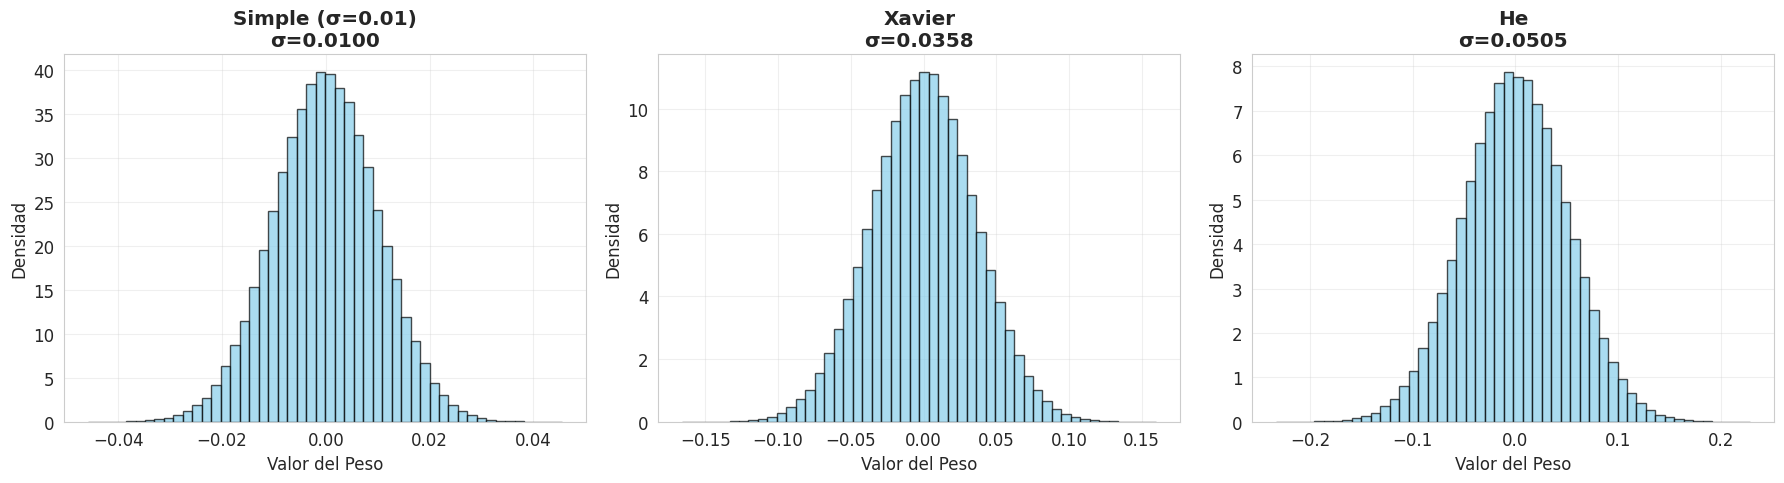

✅ Métodos de inicialización implementados


In [ ]:
# ============================================================================
# 3. MÉTODOS DE INICIALIZACIÓN
# ============================================================================

print("\n🎲 3. MÉTODOS DE INICIALIZACIÓN")
print("="*35)

print("[Problema 2] Clasificación del método de inicialización")

class SimpleInitializer:
    """
    Inicialización simple con distribución gaussiana

    Parameters
    ----------
    sigma : float
        Desviación estándar de la distribución gaussiana
    """

    def __init__(self, sigma=0.01):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Inicializar pesos

        Returns
        -------
        W : ndarray, shape (n_nodes1, n_nodes2)
            Matriz de pesos inicializados
        """
        return self.sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """
        Inicializar sesgos

        Returns
        -------
        B : ndarray, shape (n_nodes2,)
            Vector de sesgos inicializados
        """
        return np.zeros(n_nodes2)

class XavierInitializer:
    """
    [Problema 6] Inicialización Xavier (Glorot)
    Óptima para funciones sigmoid y tanh

    σ = √(1/n) donde n es el número de nodos en la capa anterior
    """

    def W(self, n_nodes1, n_nodes2):
        """
        Inicializar pesos con método Xavier
        """
        sigma = np.sqrt(1.0 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """
        Inicializar sesgos en cero
        """
        return np.zeros(n_nodes2)

class HeInitializer:
    """
    [Problema 6] Inicialización He
    Óptima para función ReLU

    σ = √(2/n) donde n es el número de nodos en la capa anterior
    """

    def W(self, n_nodes1, n_nodes2):
        """
        Inicializar pesos con método He
        """
        sigma = np.sqrt(2.0 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """
        Inicializar sesgos en cero
        """
        return np.zeros(n_nodes2)

# Demostración de diferentes inicializadores
print("🧪 COMPARANDO MÉTODOS DE INICIALIZACIÓN:")

n_nodes1, n_nodes2 = 784, 400
methods = [
    ("Simple (σ=0.01)", SimpleInitializer(0.01)),
    ("Xavier", XavierInitializer()),
    ("He", HeInitializer())
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, initializer) in enumerate(methods):
    # Generar pesos
    W = initializer.W(n_nodes1, n_nodes2)

    # Plotear histograma
    axes[idx].hist(W.flatten(), bins=50, alpha=0.7, density=True, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'{name}\nσ={np.std(W):.4f}', fontweight='bold')
    axes[idx].set_xlabel('Valor del Peso')
    axes[idx].set_ylabel('Densidad')
    axes[idx].grid(True, alpha=0.3)

    # Estadísticas
    print(f"   • {name}: mean={np.mean(W):.6f}, std={np.std(W):.6f}")

plt.tight_layout()
plt.show()

print("✅ Métodos de inicialización implementados")



⚡ 4. MÉTODOS DE OPTIMIZACIÓN
[Problema 3] Clasificación de métodos de optimización
🧪 SIMULANDO COMPORTAMIENTO DE OPTIMIZADORES:


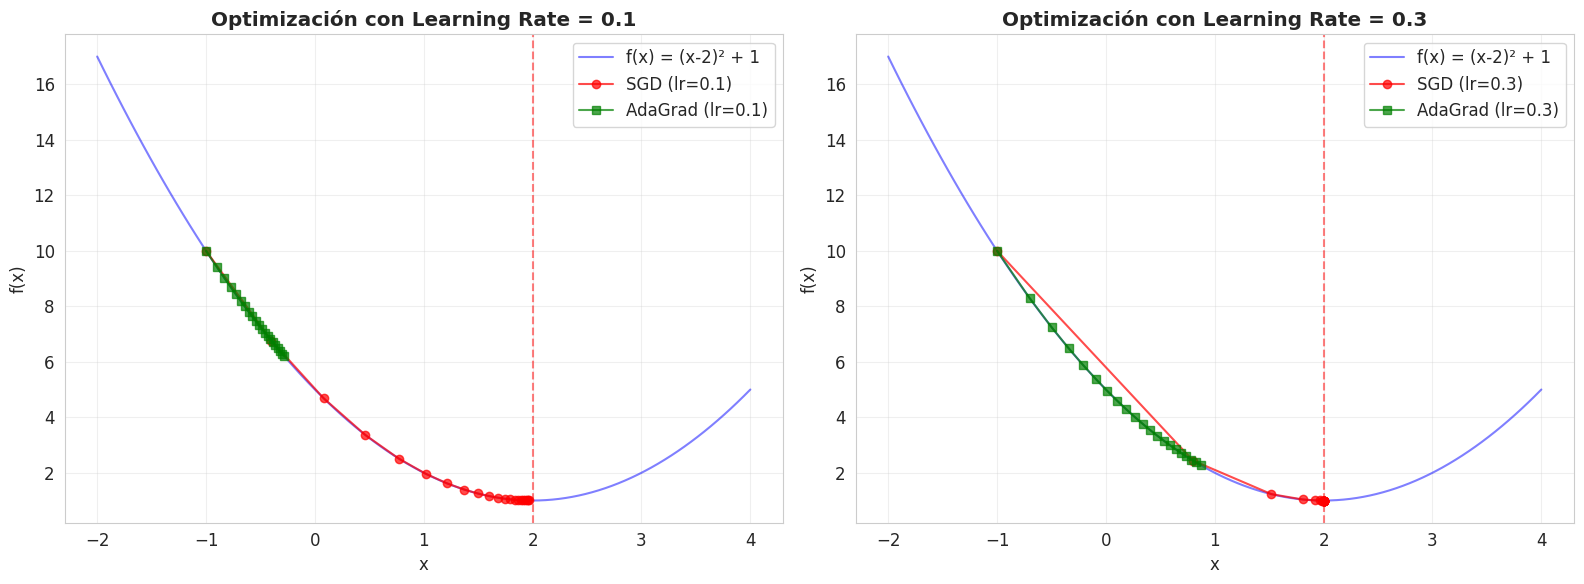

📊 ANÁLISIS:
   • SGD: Velocidad constante, puede ser lento o inestable
   • AdaGrad: Se adapta, inicialmente rápido luego más lento
   • AdaGrad útil para gradientes esparsos o irregulares
✅ Métodos de optimización implementados


In [ ]:
# ============================================================================
# 4. MÉTODOS DE OPTIMIZACIÓN
# ============================================================================

print("\n⚡ 4. MÉTODOS DE OPTIMIZACIÓN")
print("="*35)

print("[Problema 3] Clasificación de métodos de optimización")

class SGD:
    """
    Stochastic Gradient Descent (Descenso de Gradiente Estocástico)

    Parameters
    ----------
    lr : float
        Learning rate (tasa de aprendizaje)
    """

    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, layer):
        """
        Actualizar pesos y sesgos de una capa

        Parameters
        ----------
        layer : FC
            Instancia de capa completamente conectada

        Returns
        -------
        layer : FC
            Capa con parámetros actualizados
        """
        # SGD clásico: θ = θ - α∇θ
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return layer

class AdaGrad:
    """
    [Problema 7] Adaptive Gradient Algorithm
    Ajusta learning rate individualmente para cada parámetro

    Fórmula:
    H = H + ∇θ ⊙ ∇θ (suma acumulada de gradientes al cuadrado)
    θ = θ - α * (1/√(H + ε)) ⊙ ∇θ

    Parameters
    ----------
    lr : float
        Learning rate inicial
    eps : float
        Pequeño valor para evitar división por cero
    """

    def __init__(self, lr=0.01, eps=1e-8):
        self.lr = lr
        self.eps = eps
        # Historial de gradientes se inicializa en primer uso

    def update(self, layer):
        """
        Actualizar usando AdaGrad
        """
        # Inicializar historial de gradientes si es primera vez
        if not hasattr(layer, 'H_W'):
            layer.H_W = np.zeros_like(layer.W)
            layer.H_B = np.zeros_like(layer.B)

        # Acumular gradientes al cuadrado
        layer.H_W += layer.dW ** 2
        layer.H_B += layer.dB ** 2

        # Actualizar con learning rate adaptativo
        layer.W -= self.lr * layer.dW / (np.sqrt(layer.H_W) + self.eps)
        layer.B -= self.lr * layer.dB / (np.sqrt(layer.H_B) + self.eps)

        return layer

# Demostración de comportamiento de optimizadores
print("🧪 SIMULANDO COMPORTAMIENTO DE OPTIMIZADORES:")

# Función cuadrática simple: f(x) = (x-2)² + 1
def quadratic_function(x):
    return (x - 2)**2 + 1

def quadratic_gradient(x):
    return 2 * (x - 2)

# Simulación de optimización
x_start = -1.0
learning_rates = [0.1, 0.3]
max_iterations = 20

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for lr_idx, lr in enumerate(learning_rates):
    ax = axes[lr_idx]

    # Plot función
    x_range = np.linspace(-2, 4, 100)
    y_range = [quadratic_function(x) for x in x_range]
    ax.plot(x_range, y_range, 'b-', alpha=0.5, label='f(x) = (x-2)² + 1')

    # SGD
    x_sgd = x_start
    history_sgd = [x_sgd]

    for _ in range(max_iterations):
        grad = quadratic_gradient(x_sgd)
        x_sgd = x_sgd - lr * grad
        history_sgd.append(x_sgd)

    y_sgd = [quadratic_function(x) for x in history_sgd]
    ax.plot(history_sgd, y_sgd, 'ro-', alpha=0.7, label=f'SGD (lr={lr})')

    # AdaGrad simulation
    x_ada = x_start
    h_ada = 0  # Historial de gradientes
    eps = 1e-8
    history_ada = [x_ada]

    for _ in range(max_iterations):
        grad = quadratic_gradient(x_ada)
        h_ada += grad ** 2
        x_ada = x_ada - lr * grad / (np.sqrt(h_ada) + eps)
        history_ada.append(x_ada)

    y_ada = [quadratic_function(x) for x in history_ada]
    ax.plot(history_ada, y_ada, 'gs-', alpha=0.7, label=f'AdaGrad (lr={lr})')

    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(f'Optimización con Learning Rate = {lr}', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.axvline(x=2, color='red', linestyle='--', alpha=0.5, label='Óptimo (x=2)')

plt.tight_layout()
plt.show()

print(f"📊 ANÁLISIS:")
print(f"   • SGD: Velocidad constante, puede ser lento o inestable")
print(f"   • AdaGrad: Se adapta, inicialmente rápido luego más lento")
print(f"   • AdaGrad útil para gradientes esparsos o irregulares")

print("✅ Métodos de optimización implementados")



🔥 5. FUNCIONES DE ACTIVACIÓN COMPLETAS
[Problema 4] Clasificación de funciones de activación
📊 VISUALIZACIÓN COMPLETA DE FUNCIONES DE ACTIVACIÓN:


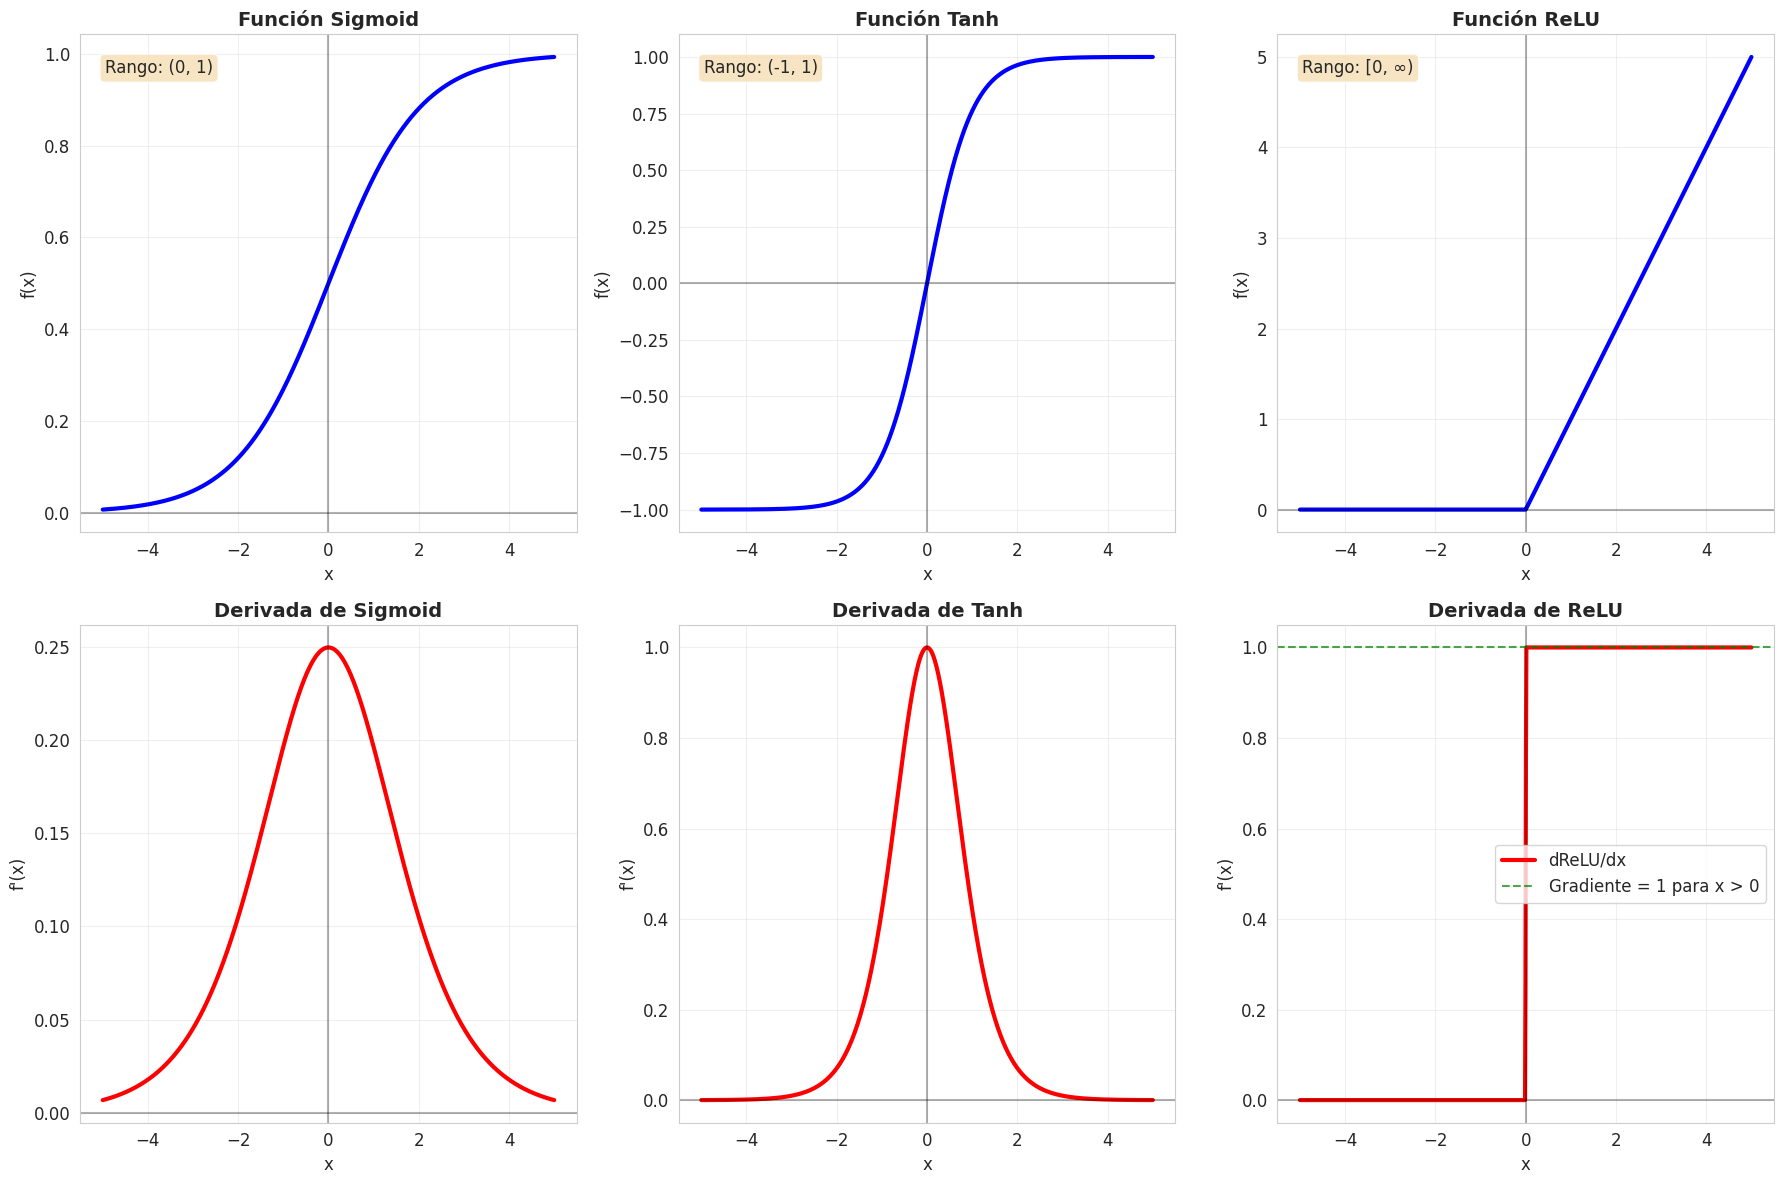


🔍 ANÁLISIS DETALLADO DE PROPIEDADES:

   📈 SIGMOID:
      • Rango: (0, 1)
      • Ventajas: Salida interpretable como probabilidad
      • Desventajas: Vanishing gradient, no centrada en 0
      • Uso típico: Capa de salida para clasificación binaria
      • Derivada máxima: 0.25 (en x=0)

   📈 TANH:
      • Rango: (-1, 1)
      • Ventajas: Centrada en 0, mejor que sigmoid para capas ocultas
      • Desventajas: Aún sufre vanishing gradient
      • Uso típico: Capas ocultas en redes no muy profundas
      • Derivada máxima: 1.0 (en x=0)

   📈 ReLU (¡MÁS IMPORTANTE!):
      • Rango: [0, ∞)
      • Ventajas: No vanishing gradient para x>0, rápida computación
      • Desventajas: Dying ReLU (neuronas 'muertas' para x≤0)
      • Uso típico: Estándar en deep learning moderno
      • Derivada: 1 para x>0, 0 para x≤0

⚠️ DEMOSTRACIÓN DEL VANISHING GRADIENT:
   • Sigmoid: Después de 5 capas: 0.000752, después de 10 capas: 0.000001
   • Tanh: Después de 5 capas: 0.389136, después de 10 capas: 

In [ ]:
# ============================================================================
# 5. FUNCIONES DE ACTIVACIÓN COMPLETAS
# ============================================================================

print("\n🔥 5. FUNCIONES DE ACTIVACIÓN COMPLETAS")
print("="*40)

print("[Problema 4] Clasificación de funciones de activación")

class Sigmoid:
    """
    Función Sigmoid: σ(x) = 1/(1 + e^(-x))
    Rango: (0, 1)
    """

    def forward(self, X):
        """Forward pass"""
        self.X = X
        # Clip para estabilidad numérica
        X_clipped = np.clip(X, -500, 500)
        self.A = 1 / (1 + np.exp(-X_clipped))
        return self.A

    def backward(self, dA):
        """
        Backward pass
        Derivada: σ'(x) = σ(x)(1 - σ(x))
        """
        dX = dA * self.A * (1 - self.A)
        return dX

class Tanh:
    """
    Función Tangente Hiperbólica
    Rango: (-1, 1)
    """

    def forward(self, X):
        self.X = X
        self.A = np.tanh(X)
        return self.A

    def backward(self, dA):
        """
        Derivada: tanh'(x) = 1 - tanh²(x)
        """
        dX = dA * (1 - self.A**2)
        return dX

class ReLU:
    """
    [Problema 5] Rectified Linear Unit: f(x) = max(0, x)

    La función de activación más popular en deep learning moderno.

    Ventajas:
    - No sufre vanishing gradient para x > 0
    - Computacionalmente eficiente
    - Convergencia más rápida

    Desventajas:
    - Dying ReLU problem (gradiente 0 para x ≤ 0)
    """

    def forward(self, X):
        """
        Forward pass: f(x) = max(0, x)
        Usando np.maximum para operación vectorizada
        """
        self.X = X
        self.A = np.maximum(0, X)
        return self.A

    def backward(self, dA):
        """
        Backward pass
        Derivada: f'(x) = 1 si x > 0, 0 si x ≤ 0

        Para x = 0, matemáticamente no es diferenciable,
        pero por convención usamos 0.
        """
        dX = dA * (self.X > 0).astype(np.float32)
        return dX

class Softmax:
    """
    Función Softmax para clasificación multiclase

    Convierte un vector de valores reales en una distribución de probabilidad.
    La suma de todas las salidas es 1.

    Fórmula: σ(x_i) = e^(x_i) / Σ_j e^(x_j)
    """

    def forward(self, X):
        """
        Forward pass con estabilidad numérica
        """
        self.X = X
        # Restar máximo para estabilidad numérica (evita overflow)
        X_shifted = X - np.max(X, axis=1, keepdims=True)
        exp_X = np.exp(X_shifted)
        self.A = exp_X / np.sum(exp_X, axis=1, keepdims=True)
        return self.A

    def backward(self, dA, Y=None):
        """
        Backward pass

        Si Y se proporciona, asume que estamos calculando el gradiente
        combinado de softmax + cross-entropy loss, lo cual es más estable.
        """
        if Y is not None:
            # Gradiente combinado softmax + cross-entropy
            batch_size = dA.shape[0] if hasattr(dA, 'shape') else len(dA)
            dX = (self.A - Y) / batch_size
        else:
            # Solo softmax (más complejo)
            batch_size = dA.shape[0]
            dX = np.zeros_like(self.X)

            for i in range(batch_size):
                # Matriz Jacobiana para softmax
                a = self.A[i:i+1]  # (1, n_classes)
                jacobian = np.diagflat(a.flatten()) - np.dot(a.T, a)
                dX[i:i+1] = np.dot(dA[i:i+1], jacobian)

        return dX

# Visualización comprehensiva de funciones de activación
print("📊 VISUALIZACIÓN COMPLETA DE FUNCIONES DE ACTIVACIÓN:")

# Crear datos de prueba
x = np.linspace(-5, 5, 1000)
x_matrix = x.reshape(-1, 1)

# Lista de activaciones para probar
activations = [
    ("Sigmoid", Sigmoid()),
    ("Tanh", Tanh()),
    ("ReLU", ReLU())
]

# Crear gráficos
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for idx, (name, activation) in enumerate(activations):
    # Forward pass
    y = activation.forward(x_matrix).flatten()

    # Gráfico de la función
    axes[0, idx].plot(x, y, linewidth=3, color='blue', label=f'{name}')
    axes[0, idx].set_title(f'Función {name}', fontweight='bold', fontsize=14)
    axes[0, idx].set_xlabel('x')
    axes[0, idx].set_ylabel('f(x)')
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[0, idx].axvline(x=0, color='black', linestyle='-', alpha=0.3)

    # Agregar información del rango
    y_min, y_max = np.min(y), np.max(y)
    if name == 'Sigmoid':
        range_text = 'Rango: (0, 1)'
    elif name == 'Tanh':
        range_text = 'Rango: (-1, 1)'
    elif name == 'ReLU':
        range_text = 'Rango: [0, ∞)'

    axes[0, idx].text(0.05, 0.95, range_text, transform=axes[0, idx].transAxes,
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                     verticalalignment='top')

    # Derivada (aproximación numérica para visualización)
    dx = x[1] - x[0]
    dy_numerical = np.gradient(y, dx)

    axes[1, idx].plot(x, dy_numerical, linewidth=3, color='red', label=f"d{name}/dx")
    axes[1, idx].set_title(f'Derivada de {name}', fontweight='bold', fontsize=14)
    axes[1, idx].set_xlabel('x')
    axes[1, idx].set_ylabel("f'(x)")
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, idx].axvline(x=0, color='black', linestyle='-', alpha=0.3)

    # Resaltar características especiales de la derivada
    if name == 'ReLU':
        axes[1, idx].axhline(y=1, color='green', linestyle='--', alpha=0.7,
                            label='Gradiente = 1 para x > 0')
        axes[1, idx].legend()

plt.tight_layout()
plt.show()

# Análisis detallado de propiedades
print(f"\n🔍 ANÁLISIS DETALLADO DE PROPIEDADES:")

print(f"\n   📈 SIGMOID:")
print(f"      • Rango: (0, 1)")
print(f"      • Ventajas: Salida interpretable como probabilidad")
print(f"      • Desventajas: Vanishing gradient, no centrada en 0")
print(f"      • Uso típico: Capa de salida para clasificación binaria")
print(f"      • Derivada máxima: 0.25 (en x=0)")

print(f"\n   📈 TANH:")
print(f"      • Rango: (-1, 1)")
print(f"      • Ventajas: Centrada en 0, mejor que sigmoid para capas ocultas")
print(f"      • Desventajas: Aún sufre vanishing gradient")
print(f"      • Uso típico: Capas ocultas en redes no muy profundas")
print(f"      • Derivada máxima: 1.0 (en x=0)")

print(f"\n   📈 ReLU (¡MÁS IMPORTANTE!):")
print(f"      • Rango: [0, ∞)")
print(f"      • Ventajas: No vanishing gradient para x>0, rápida computación")
print(f"      • Desventajas: Dying ReLU (neuronas 'muertas' para x≤0)")
print(f"      • Uso típico: Estándar en deep learning moderno")
print(f"      • Derivada: 1 para x>0, 0 para x≤0")

# Demostración práctica del problema de vanishing gradient
print(f"\n⚠️ DEMOSTRACIÓN DEL VANISHING GRADIENT:")

# Simular gradientes que se propagan hacia atrás
initial_gradient = 1.0
layers_deep = 10

activations_test = [
    ("Sigmoid", Sigmoid()),
    ("Tanh", Tanh()),
    ("ReLU", ReLU())
]

for name, activation in activations_test:
    current_gradient = initial_gradient

    for layer in range(layers_deep):
        # Simular entrada aleatoria
        x_test = np.random.randn(1, 100) * 0.5

        # Forward pass
        activation.forward(x_test)

        # Simular gradiente desde capa siguiente
        dA_test = np.ones_like(activation.A) * current_gradient

        # Backward pass
        dX = activation.backward(dA_test)

        # El gradiente promedio que se propaga
        current_gradient = np.mean(np.abs(dX))

        if layer == 4:  # Después de 5 capas
            gradient_5_layers = current_gradient
        elif layer == 9:  # Después de 10 capas
            gradient_10_layers = current_gradient

    print(f"   • {name}: Después de 5 capas: {gradient_5_layers:.6f}, "
          f"después de 10 capas: {gradient_10_layers:.6f}")

print(f"\n💡 OBSERVACIÓN:")
print(f"   ReLU mantiene gradientes más estables en redes profundas,")
print(f"   por eso es la elección estándar en deep learning moderno.")

print("✅ Funciones de activación completas implementadas y analizadas")


In [ ]:
# ============================================================================
# 6. CAPA COMPLETAMENTE CONECTADA (FULLY CONNECTED)
# ============================================================================

print("\n🔗 6. CAPA COMPLETAMENTE CONECTADA")
print("="*40)

print("[Problema 1] Clasificación de capa completamente conectada")

class FC:
    """
    Fully Connected Layer (Capa Completamente Conectada)

    Implementa la transformación lineal: A = X @ W + B
    donde:
    - X: entrada de la capa anterior
    - W: matriz de pesos
    - B: vector de sesgos
    - A: salida antes de aplicar función de activación

    Parameters
    ----------
    n_nodes1 : int
        Número de nodos en la capa anterior
    n_nodes2 : int
        Número de nodos en esta capa
    initializer : Initializer
        Instancia del método de inicialización de pesos
    optimizer : Optimizer
        Instancia del método de optimización
    """

    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2

        # Inicializar pesos y sesgos usando el inicializador
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

        # Variables para almacenar durante forward/backward
        self.X = None  # Entrada (necesaria para backward)
        self.dW = None  # Gradiente de pesos
        self.dB = None  # Gradiente de sesgos

    def forward(self, X):
        """
        Forward pass: A = X @ W + B

        Parameters
        ----------
        X : ndarray, shape (batch_size, n_nodes1)
            Entrada desde la capa anterior

        Returns
        -------
        A : ndarray, shape (batch_size, n_nodes2)
            Salida hacia la siguiente capa (antes de activación)
        """
        self.X = X  # Guardar para backward pass
        A = X @ self.W + self.B  # Transformación lineal
        return A

    def backward(self, dA):
        """
        Backward pass

        Calcula gradientes y actualiza parámetros usando el optimizador.

        Parameters
        ----------
        dA : ndarray, shape (batch_size, n_nodes2)
            Gradiente que llega desde la siguiente capa

        Returns
        -------
        dZ : ndarray, shape (batch_size, n_nodes1)
            Gradiente que se propaga hacia la capa anterior
        """
        batch_size = dA.shape[0]

        # Calcular gradientes de los parámetros
        # dW = X^T @ dA  (gradiente respecto a pesos)
        self.dW = self.X.T @ dA

        # dB = sum(dA, axis=0)  (gradiente respecto a sesgos)
        self.dB = np.sum(dA, axis=0)

        # Gradiente que se propaga hacia atrás
        # dZ = dA @ W^T
        dZ = dA @ self.W.T

        # Actualizar parámetros usando el optimizador
        # El optimizador modifica self.W y self.B basado en self.dW y self.dB
        self = self.optimizer.update(self)

        return dZ

# Demostración de la capa FC
print("🧪 PROBANDO CAPA COMPLETAMENTE CONECTADA:")

# Crear datos de prueba
batch_size = 32
n_features = 784  # Como MNIST
n_hidden = 400

X_test = np.random.randn(batch_size, n_features) * 0.1

print(f"\n📊 CONFIGURACIÓN DE PRUEBA:")
print(f"   • Batch size: {batch_size}")
print(f"   • Características de entrada: {n_features}")
print(f"   • Neuronas en capa: {n_hidden}")

# Probar con diferentes inicializadores
initializers_test = [
    ("Simple", SimpleInitializer(0.01)),
    ("Xavier", XavierInitializer()),
    ("He", HeInitializer())
]

print(f"\n🔬 COMPARANDO INICIALIZADORES:")

for init_name, initializer in initializers_test:
    print(f"\n   🎲 {init_name} Initializer:")

    # Crear capa con optimizador SGD
    optimizer = SGD(lr=0.01)
    fc_layer = FC(n_features, n_hidden, initializer, optimizer)

    print(f"      • Forma de pesos W: {fc_layer.W.shape}")
    print(f"      • Forma de sesgos B: {fc_layer.B.shape}")
    print(f"      • Media de W: {np.mean(fc_layer.W):.6f}")
    print(f"      • Std de W: {np.std(fc_layer.W):.6f}")
    print(f"      • Rango de W: [{np.min(fc_layer.W):.4f}, {np.max(fc_layer.W):.4f}]")

    # Forward pass
    A = fc_layer.forward(X_test)
    print(f"      • Forma de salida A: {A.shape}")
    print(f"      • Media de A: {np.mean(A):.6f}")
    print(f"      • Std de A: {np.std(A):.6f}")
    print(f"      • Activaciones explodidas: {np.sum(np.abs(A) > 10)} de {A.size}")

# Prueba completa de forward y backward
print(f"\n🔄 PRUEBA COMPLETA FORWARD-BACKWARD:")

# Crear capa de prueba
optimizer_test = SGD(lr=0.01)
initializer_test = HeInitializer()  # Mejor para ReLU
fc_test = FC(n_features, n_hidden, initializer_test, optimizer_test)

print(f"   📤 Forward Pass:")
# Forward
A_output = fc_test.forward(X_test)
print(f"      • Entrada X: {X_test.shape}")
print(f"      • Salida A: {A_output.shape}")
print(f"      • Media salida: {np.mean(A_output):.4f}")

print(f"   📥 Backward Pass:")
# Simular gradiente desde siguiente capa (como si fuera error)
dA_input = np.random.randn(*A_output.shape) * 0.1

# Guardar pesos originales para comparar
W_original = fc_test.W.copy()
B_original = fc_test.B.copy()

# Backward
dZ_output = fc_test.backward(dA_input)

print(f"      • Gradiente entrada dA: {dA_input.shape}")
print(f"      • Gradiente salida dZ: {dZ_output.shape}")
print(f"      • Gradiente pesos dW: {fc_test.dW.shape}")
print(f"      • Gradiente sesgos dB: {fc_test.dB.shape}")

# Verificar que los pesos se actualizaron
W_change = np.mean(np.abs(fc_test.W - W_original))
B_change = np.mean(np.abs(fc_test.B - B_original))

print(f"      • Cambio promedio en W: {W_change:.8f}")
print(f"      • Cambio promedio en B: {B_change:.8f}")
print(f"      • ✅ Pesos actualizados correctamente" if W_change > 0 else "      • ❌ Error: pesos no cambiaron")

print("✅ Capa completamente conectada implementada y probada")



🔗 6. CAPA COMPLETAMENTE CONECTADA
[Problema 1] Clasificación de capa completamente conectada
🧪 PROBANDO CAPA COMPLETAMENTE CONECTADA:

📊 CONFIGURACIÓN DE PRUEBA:
   • Batch size: 32
   • Características de entrada: 784
   • Neuronas en capa: 400

🔬 COMPARANDO INICIALIZADORES:

   🎲 Simple Initializer:
      • Forma de pesos W: (784, 400)
      • Forma de sesgos B: (400,)
      • Media de W: 0.000015
      • Std de W: 0.010011
      • Rango de W: [-0.0425, 0.0448]
      • Forma de salida A: (32, 400)
      • Media de A: 0.000191
      • Std de A: 0.028305
      • Activaciones explodidas: 0 de 12800

   🎲 Xavier Initializer:
      • Forma de pesos W: (784, 400)
      • Forma de sesgos B: (400,)
      • Media de W: -0.000041
      • Std de W: 0.035715
      • Rango de W: [-0.1807, 0.1601]
      • Forma de salida A: (32, 400)
      • Media de A: 0.000320
      • Std de A: 0.099895
      • Activaciones explodidas: 0 de 12800

   🎲 He Initializer:
      • Forma de pesos W: (784, 400)
      


🎲 7. MÉTODOS DE INICIALIZACIÓN AVANZADOS
[Problema 2] Clasificación del método de inicialización
[Problema 6] Valores de peso iniciales avanzados
🧮 ANÁLISIS TEÓRICO DE INICIALIZADORES:

📊 COMPARACIÓN CON 784 → 400 neuronas:
   • Simple (σ=0.01):
     - Desviación teórica: 0.010000
     - Desviación real: 0.009999
     - Media: -0.000003
     - Error teórico: 0.000001
   • Simple (σ=0.1):
     - Desviación teórica: 0.100000
     - Desviación real: 0.099993
     - Media: 0.000055
     - Error teórico: 0.000007
   • Xavier:
     - Desviación teórica: 0.035714
     - Desviación real: 0.035717
     - Media: -0.000012
     - Error teórico: 0.000003
   • He:
     - Desviación teórica: 0.050508
     - Desviación real: 0.050497
     - Media: 0.000015
     - Error teórico: 0.000011


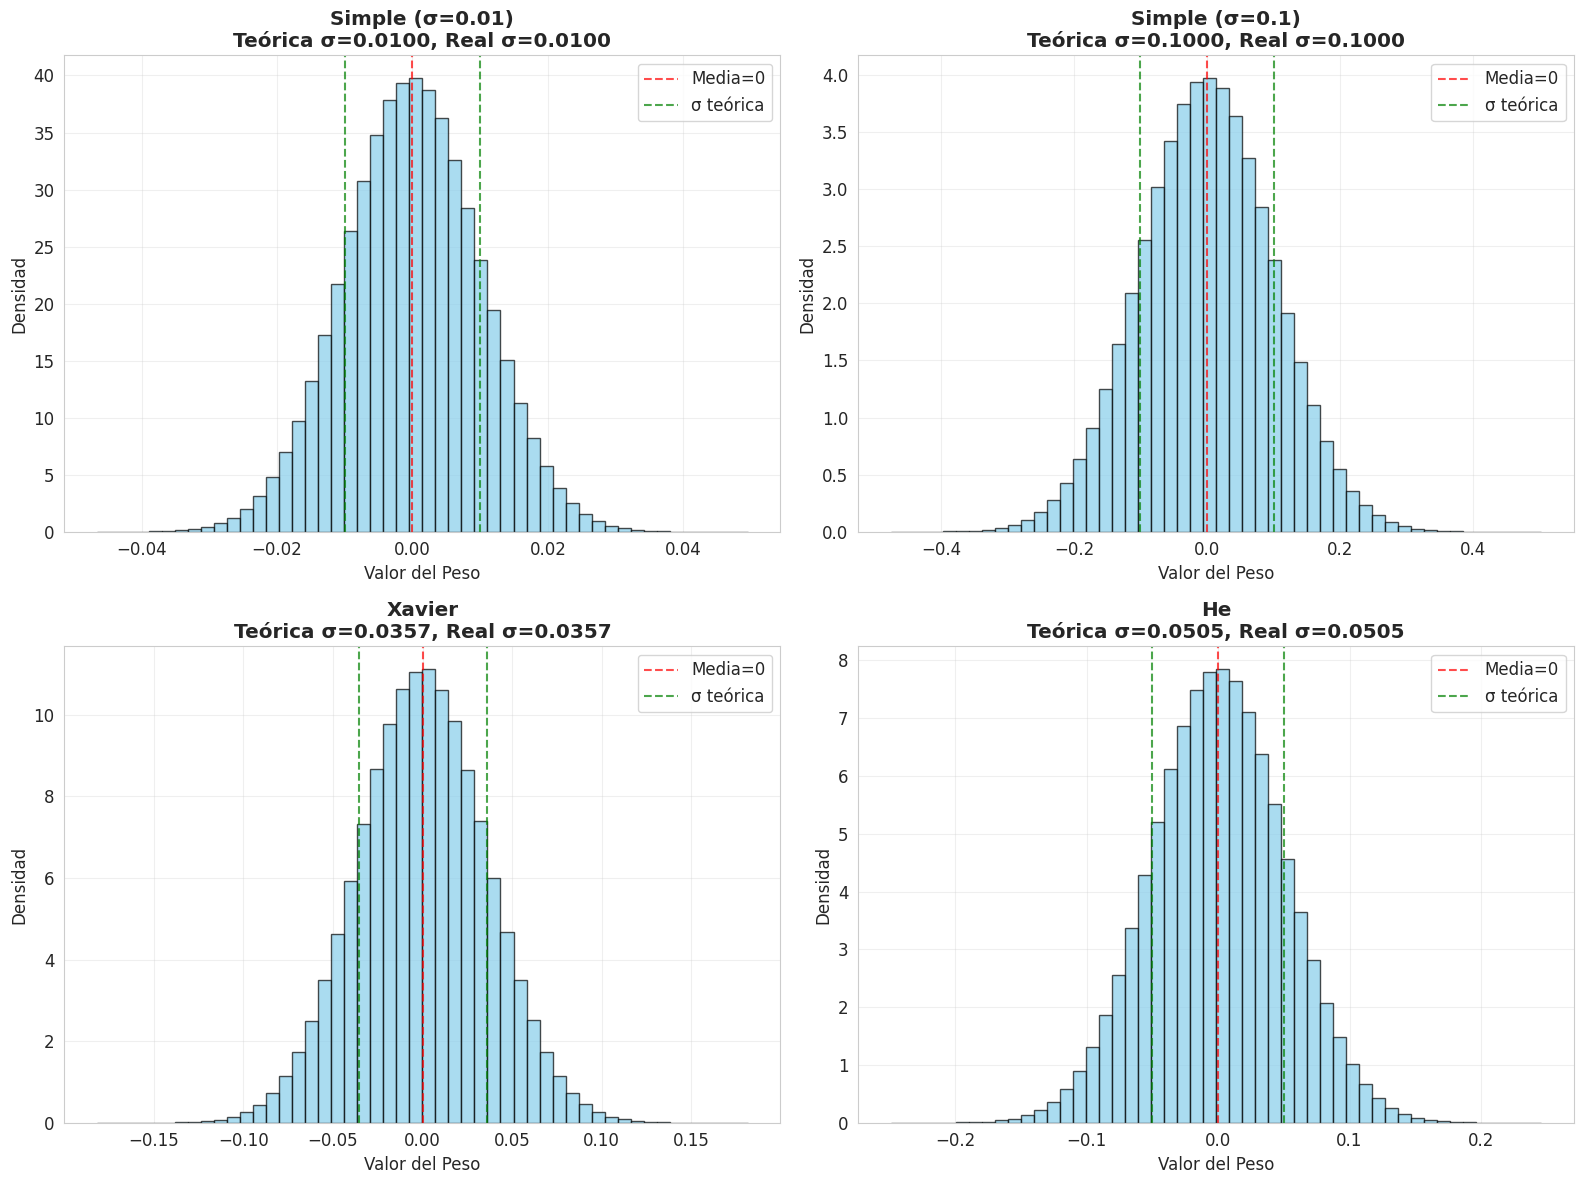


🎯 IMPACTO EN ACTIVACIONES INICIALES:
   🔬 Tanh + Xavier:
      • A (pre-activación): mean=0.0001, std=0.0996
      • Z (post-activación): mean=0.0001, std=0.0987
      • Neuronas 'muertas' (Z=0): 0 de 40000
   🔬 Tanh + He:
      • A (pre-activación): mean=0.0013, std=0.1418
      • Z (post-activación): mean=0.0013, std=0.1390
      • Neuronas 'muertas' (Z=0): 0 de 40000
   🔬 ReLU + Xavier:
      • A (pre-activación): mean=0.0003, std=0.1003
      • Z (post-activación): mean=0.0403, std=0.0586
      • Neuronas 'muertas' (Z=0): 20016 de 40000
   🔬 ReLU + He:
      • A (pre-activación): mean=-0.0000, std=0.1418
      • Z (post-activación): mean=0.0565, std=0.0829
      • Neuronas 'muertas' (Z=0): 19932 de 40000

💡 RECOMENDACIONES PRÁCTICAS:
   🔸 Usa He para ReLU y sus variantes (LeakyReLU, ELU, etc.)
   🔸 Usa Xavier para Sigmoid y Tanh
   🔸 Simple con σ pequeña solo para redes muy superficiales
   🔸 He es generalmente seguro como inicialización por defecto
   🔸 En redes muy profundas, co

In [ ]:
# ============================================================================
# 7. MÉTODOS DE INICIALIZACIÓN AVANZADOS
# ============================================================================

print("\n🎲 7. MÉTODOS DE INICIALIZACIÓN AVANZADOS")
print("="*45)

print("[Problema 2] Clasificación del método de inicialización")
print("[Problema 6] Valores de peso iniciales avanzados")

class SimpleInitializer:
    """
    Inicialización simple con distribución gaussiana

    Método básico que usa σ fijo para todos los pesos.

    Parameters
    ----------
    sigma : float
        Desviación estándar de la distribución gaussiana
    """

    def __init__(self, sigma=0.01):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Inicializar matriz de pesos

        Returns
        -------
        W : ndarray, shape (n_nodes1, n_nodes2)
            Matriz de pesos inicializados con N(0, σ²)
        """
        return self.sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """
        Inicializar vector de sesgos en cero

        Returns
        -------
        B : ndarray, shape (n_nodes2,)
            Vector de sesgos inicializados en 0
        """
        return np.zeros(n_nodes2)

class XavierInitializer:
    """
    [Problema 6] Inicialización Xavier (Glorot)

    Diseñada para funciones sigmoid y tanh.
    Mantiene la varianza de activaciones y gradientes similar
    entre capas al inicio del entrenamiento.

    Fórmula: σ = √(1/n)
    donde n es el número de nodos en la capa anterior

    Paper: "Understanding the difficulty of training deep feedforward
    neural networks" - Glorot & Bengio (2010)
    """

    def W(self, n_nodes1, n_nodes2):
        """
        Inicializar con método Xavier

        La desviación estándar se ajusta según el número de nodos
        de entrada para mantener la varianza estable.
        """
        sigma = np.sqrt(1.0 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """Sesgos en cero (estándar)"""
        return np.zeros(n_nodes2)

class HeInitializer:
    """
    [Problema 6] Inicialización He

    Diseñada específicamente para función ReLU y sus variantes.
    Compensa el hecho de que ReLU "mata" la mitad de las neuronas,
    duplicando la varianza inicial.

    Fórmula: σ = √(2/n)
    donde n es el número de nodos en la capa anterior

    Paper: "Delving Deep into Rectifiers: Surpassing Human-Level
    Performance on ImageNet Classification" - He et al. (2015)
    """

    def W(self, n_nodes1, n_nodes2):
        """
        Inicializar con método He

        El factor √2 adicional compensa por ReLU que elimina
        aproximadamente la mitad de las activaciones.
        """
        sigma = np.sqrt(2.0 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """Sesgos en cero"""
        return np.zeros(n_nodes2)

# Análisis teórico y práctico de inicializadores
print("🧮 ANÁLISIS TEÓRICO DE INICIALIZADORES:")

n_nodes1, n_nodes2 = 784, 400

methods = [
    ("Simple (σ=0.01)", SimpleInitializer(0.01)),
    ("Simple (σ=0.1)", SimpleInitializer(0.1)),
    ("Xavier", XavierInitializer()),
    ("He", HeInitializer())
]

print(f"\n📊 COMPARACIÓN CON {n_nodes1} → {n_nodes2} neuronas:")

# Crear gráficos comparativos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

theoretical_stds = []
actual_stds = []
method_names = []

for idx, (name, initializer) in enumerate(methods):
    # Generar pesos múltiples veces para estadísticas estables
    all_weights = []
    for _ in range(10):
        W = initializer.W(n_nodes1, n_nodes2)
        all_weights.append(W.flatten())

    all_weights = np.concatenate(all_weights)

    # Calcular estadísticas
    actual_std = np.std(all_weights)
    actual_mean = np.mean(all_weights)

    # Calcular std teórica esperada
    if "Simple" in name:
        if "0.01" in name:
            theoretical_std = 0.01
        else:
            theoretical_std = 0.1
    elif "Xavier" in name:
        theoretical_std = np.sqrt(1.0 / n_nodes1)
    elif "He" in name:
        theoretical_std = np.sqrt(2.0 / n_nodes1)

    theoretical_stds.append(theoretical_std)
    actual_stds.append(actual_std)
    method_names.append(name)

    # Histograma
    if idx < 4:
        axes[idx].hist(all_weights, bins=50, density=True, alpha=0.7,
                      color='skyblue', edgecolor='black')
        axes[idx].set_title(f'{name}\nTeórica σ={theoretical_std:.4f}, '
                           f'Real σ={actual_std:.4f}', fontweight='bold')
        axes[idx].set_xlabel('Valor del Peso')
        axes[idx].set_ylabel('Densidad')
        axes[idx].grid(True, alpha=0.3)

        # Líneas de referencia
        axes[idx].axvline(0, color='red', linestyle='--', alpha=0.7, label='Media=0')
        axes[idx].axvline(theoretical_std, color='green', linestyle='--',
                         alpha=0.7, label=f'σ teórica')
        axes[idx].axvline(-theoretical_std, color='green', linestyle='--', alpha=0.7)
        axes[idx].legend()

    # Imprimir estadísticas
    print(f"   • {name}:")
    print(f"     - Desviación teórica: {theoretical_std:.6f}")
    print(f"     - Desviación real: {actual_std:.6f}")
    print(f"     - Media: {actual_mean:.6f}")
    print(f"     - Error teórico: {abs(theoretical_std - actual_std):.6f}")

plt.tight_layout()
plt.show()

# Demostración práctica del impacto en activaciones
print(f"\n🎯 IMPACTO EN ACTIVACIONES INICIALES:")

# Simular forward pass con diferentes inicializadores
batch_size = 100
X_demo = np.random.randn(batch_size, n_nodes1) * 0.1  # Entrada normalizada

activations_to_test = [
    ("Tanh + Xavier", Tanh(), XavierInitializer()),
    ("Tanh + He", Tanh(), HeInitializer()),
    ("ReLU + Xavier", ReLU(), XavierInitializer()),
    ("ReLU + He", ReLU(), HeInitializer())
]

for combo_name, activation, initializer in activations_to_test:
    # Crear pesos
    W = initializer.W(n_nodes1, n_nodes2)
    B = initializer.B(n_nodes2)

    # Forward pass manual
    A = X_demo @ W + B  # Antes de activación
    Z = activation.forward(A)  # Después de activación

    print(f"   🔬 {combo_name}:")
    print(f"      • A (pre-activación): mean={np.mean(A):.4f}, std={np.std(A):.4f}")
    print(f"      • Z (post-activación): mean={np.mean(Z):.4f}, std={np.std(Z):.4f}")
    print(f"      • Neuronas 'muertas' (Z=0): {np.sum(Z == 0)} de {Z.size}")

# Recomendaciones prácticas
print(f"\n💡 RECOMENDACIONES PRÁCTICAS:")

recommendations = [
    "🔸 Usa He para ReLU y sus variantes (LeakyReLU, ELU, etc.)",
    "🔸 Usa Xavier para Sigmoid y Tanh",
    "🔸 Simple con σ pequeña solo para redes muy superficiales",
    "🔸 He es generalmente seguro como inicialización por defecto",
    "🔸 En redes muy profundas, considera inicializaciones adaptativas",
    "🔸 Batch Normalization reduce sensibilidad a inicialización"
]

for rec in recommendations:
    print(f"   {rec}")

print("✅ Métodos de inicialización avanzados implementados y analizados")



⚡ 8. OPTIMIZADORES AVANZADOS
[Problema 3] Clasificación de métodos de optimización
[Problema 7] Método de optimización AdaGrad
🧪 SIMULACIÓN COMPARATIVA DE OPTIMIZADORES:


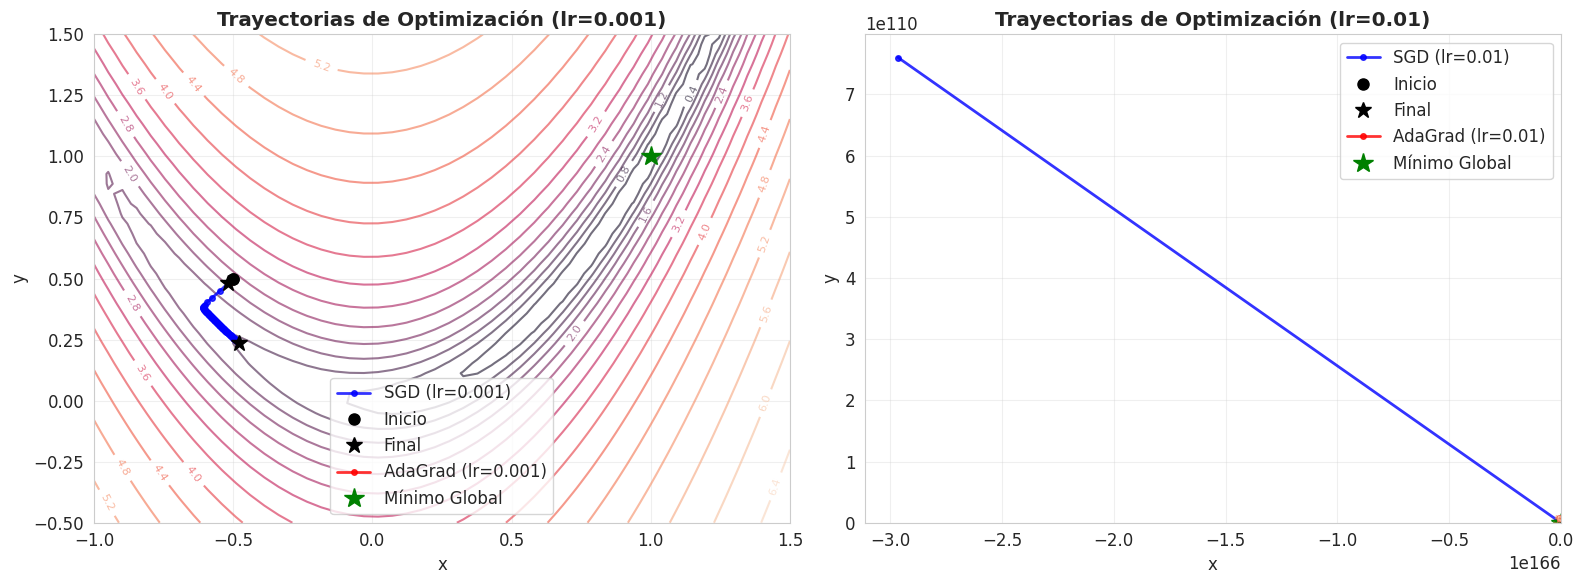


📊 ANÁLISIS DEL COMPORTAMIENTO ADAPTATIVO:


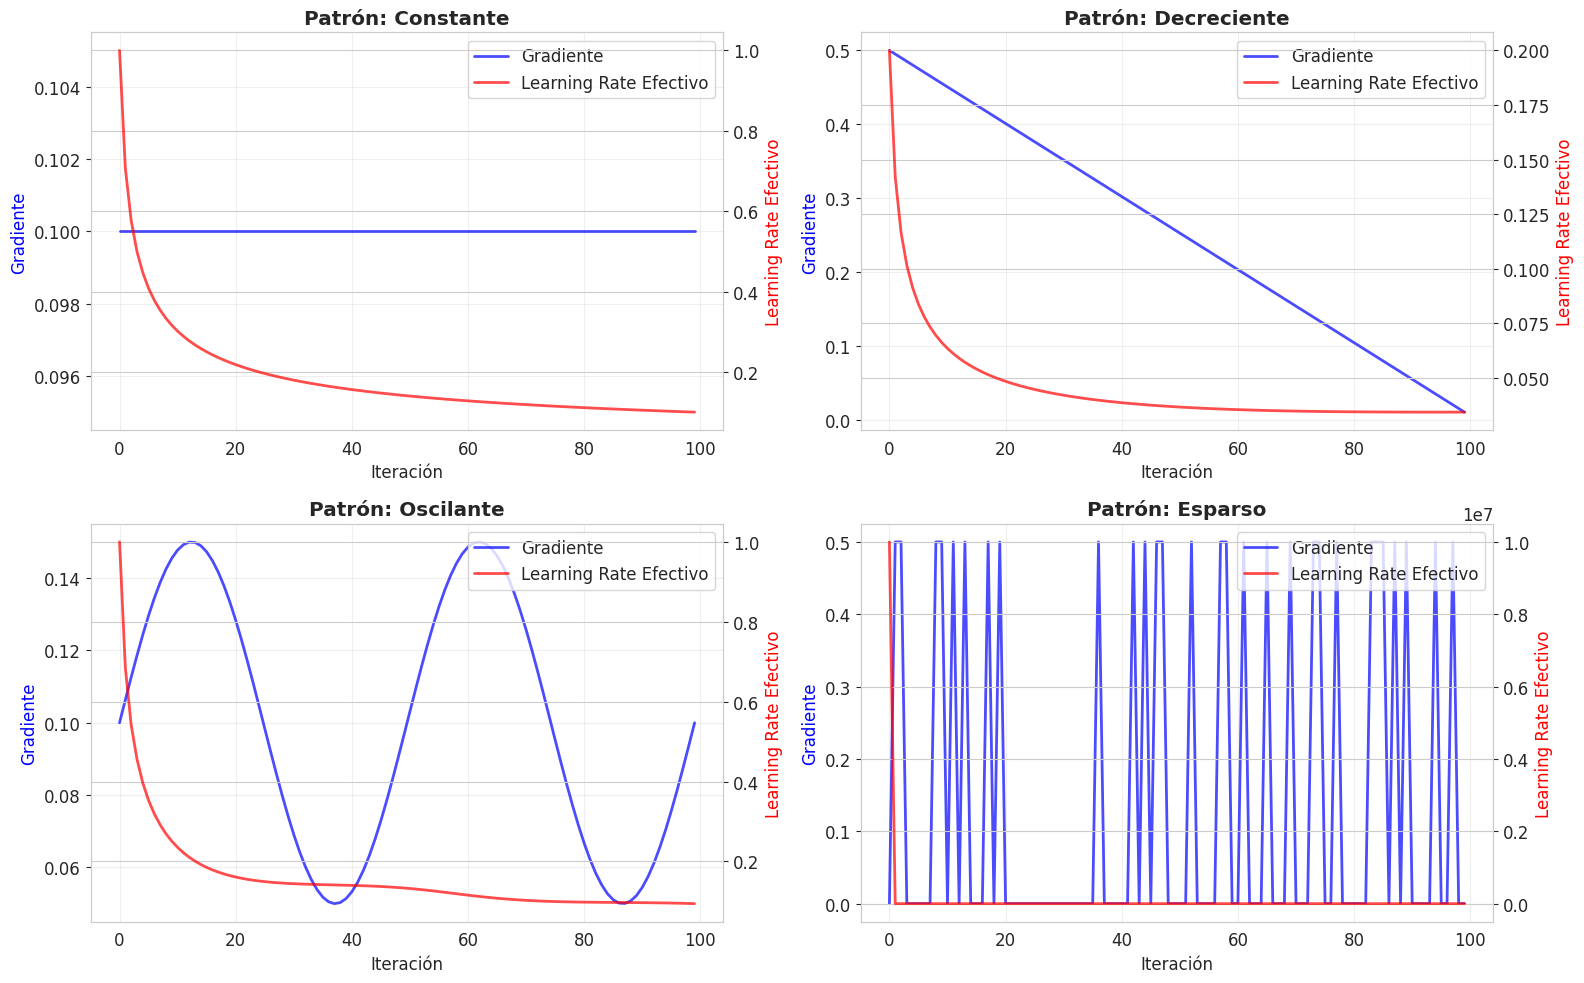


⚖️ ANÁLISIS DETALLADO DE OPTIMIZADORES:

   🔵 SGD (Stochastic Gradient Descent):
      ✅ Ventajas:
         • Simple y estable
         • Memoria eficiente
         • Bien entendido teóricamente
         • Funciona bien con momentum
      ❌ Desventajas:
         • Learning rate fijo puede ser subóptimo
         • Convergencia lenta en valles estrechos
         • Sensible a escala de características

   🔴 AdaGrad:
      ✅ Ventajas:
         • Learning rate adaptativo por parámetro
         • Excelente para gradientes esparsos
         • Menos sensible al learning rate inicial
         • Converge rápido inicialmente
      ❌ Desventajas:
         • Learning rate solo decrece (monotónico)
         • Puede parar de aprender prematuramente
         • Uso de memoria adicional (historial)

💡 RECOMENDACIONES DE USO:
   🔸 SGD: Baseline sólido, especialmente con momentum
   🔸 AdaGrad: Problemas con características escasas/irregulares
   🔸 Para deep learning moderno: Adam o RMSprop (próximos spri

In [ ]:
# ============================================================================
# 8. OPTIMIZADORES AVANZADOS
# ============================================================================

print("\n⚡ 8. OPTIMIZADORES AVANZADOS")
print("="*35)

print("[Problema 3] Clasificación de métodos de optimización")
print("[Problema 7] Método de optimización AdaGrad")

class SGD:
    """
    Stochastic Gradient Descent (Descenso de Gradiente Estocástico)

    El optimizador más básico. Actualiza parámetros con tasa de
    aprendizaje fija para todos los parámetros.

    Fórmula: θ = θ - α∇θ

    Parameters
    ----------
    lr : float
        Learning rate (tasa de aprendizaje)
    """

    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, layer):
        """
        Actualizar parámetros de una capa

        Parameters
        ----------
        layer : FC
            Instancia de capa con gradientes calculados

        Returns
        -------
        layer : FC
            Capa con parámetros actualizados
        """
        # Actualización clásica de SGD
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return layer

class AdaGrad:
    """
    [Problema 7] Adaptive Gradient Algorithm

    Optimizador adaptativo que ajusta la tasa de aprendizaje
    individualmente para cada parámetro basado en el historial
    de gradientes.

    Ventajas:
    - Learning rate adaptativo por parámetro
    - Converge más rápido en gradientes esparsos
    - Menos sensible al learning rate inicial

    Desventajas:
    - Learning rate siempre decrece (nunca aumenta)
    - Puede volverse muy pequeño y parar el aprendizaje

    Fórmulas:
    H_t = H_{t-1} + ∇θ_t ⊙ ∇θ_t  (suma acumulada de gradientes²)
    θ_{t+1} = θ_t - (α / √(H_t + ε)) ⊙ ∇θ_t

    donde ⊙ es producto elemento a elemento (Hadamard)

    Paper: "Adaptive Subgradient Methods for Online Learning and
    Stochastic Optimization" - Duchi et al. (2011)
    """

    def __init__(self, lr=0.01, eps=1e-8):
        """
        Parameters
        ----------
        lr : float
            Learning rate inicial
        eps : float
            Pequeña constante para evitar división por cero
        """
        self.lr = lr
        self.eps = eps
        # El historial de gradientes se inicializa dinámicamente
        # para cada capa en el primer uso

    def update(self, layer):
        """
        Actualizar usando AdaGrad

        Cada parámetro tiene su propio learning rate adaptativo
        basado en la historia de sus gradientes al cuadrado.
        """
        # Inicializar historial de gradientes en primer uso
        if not hasattr(layer, 'H_W'):
            layer.H_W = np.zeros_like(layer.W)
            layer.H_B = np.zeros_like(layer.B)

        # Acumular gradientes al cuadrado (historial)
        layer.H_W += layer.dW ** 2  # Elemento a elemento
        layer.H_B += layer.dB ** 2

        # Actualizar parámetros con learning rate adaptativo
        # lr_adaptativo = lr / √(historial + ε)
        layer.W -= self.lr * layer.dW / (np.sqrt(layer.H_W) + self.eps)
        layer.B -= self.lr * layer.dB / (np.sqrt(layer.H_B) + self.eps)

        return layer

# Comparación visual de optimizadores
print("🧪 SIMULACIÓN COMPARATIVA DE OPTIMIZADORES:")

# Función de prueba: parábola 2D con mínimo global
def rosenbrock_2d(x, y):
    """Función Rosenbrock simplificada para prueba"""
    return (1 - x)**2 + 100*(y - x**2)**2

def rosenbrock_gradient(x, y):
    """Gradiente de la función Rosenbrock"""
    dx = -2*(1 - x) - 400*x*(y - x**2)
    dy = 200*(y - x**2)
    return np.array([dx, dy])

# Simular optimización en función 2D
def simulate_optimization(optimizer_class, lr, start_point, iterations=50):
    """Simular optimización en función 2D"""
    # Simular una "capa" con parámetros 2D
    class MockLayer:
        def __init__(self):
            self.W = np.array([[start_point[0]]])
            self.B = np.array([start_point[1]])
            self.dW = None
            self.dB = None

    layer = MockLayer()
    optimizer = optimizer_class(lr=lr)

    history = []

    for i in range(iterations):
        # Posición actual
        x, y = layer.W[0,0], layer.B[0]
        history.append([x, y])

        # Calcular gradientes
        grad = rosenbrock_gradient(x, y)
        layer.dW = np.array([[grad[0]]])
        layer.dB = np.array([grad[1]])

        # Actualizar con optimizador
        layer = optimizer.update(layer)

        # Criterio de parada (cerca del mínimo)
        if np.linalg.norm([x - 1, y - 1]) < 0.01:
            break

    return np.array(history)

# Ejecutar simulación
start_point = [-0.5, 0.5]  # Punto inicial
learning_rates = [0.001, 0.01]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for lr_idx, lr in enumerate(learning_rates):
    ax = axes[lr_idx]

    # Crear contorno de la función
    x_range = np.linspace(-1, 1.5, 50)
    y_range = np.linspace(-0.5, 1.5, 50)
    X_grid, Y_grid = np.meshgrid(x_range, y_range)
    Z_grid = rosenbrock_2d(X_grid, Y_grid)

    # Dibujar contorno (logarítmico para mejor visualización)
    contour = ax.contour(X_grid, Y_grid, np.log(Z_grid + 1), levels=20, alpha=0.6)
    ax.clabel(contour, inline=True, fontsize=8)

    # Optimizadores a comparar
    optimizers = [
        ("SGD", SGD, 'blue'),
        ("AdaGrad", AdaGrad, 'red')
    ]

    for opt_name, opt_class, color in optimizers:
        history = simulate_optimization(opt_class, lr, start_point, iterations=100)

        # Plotear trayectoria
        ax.plot(history[:, 0], history[:, 1], 'o-', color=color,
               linewidth=2, markersize=4, alpha=0.8, label=f'{opt_name} (lr={lr})')

        # Marcar inicio y fin
        ax.plot(history[0, 0], history[0, 1], 'ko', markersize=8, label='Inicio' if opt_name == 'SGD' else "")
        ax.plot(history[-1, 0], history[-1, 1], 'k*', markersize=12, label='Final' if opt_name == 'SGD' else "")

    # Marcar mínimo global
    ax.plot(1, 1, 'g*', markersize=15, label='Mínimo Global')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Trayectorias de Optimización (lr={lr})', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de comportamiento adaptativo de AdaGrad
print(f"\n📊 ANÁLISIS DEL COMPORTAMIENTO ADAPTATIVO:")

# Simular gradientes con diferentes patrones
def analyze_adagrad_behavior():
    """Analizar cómo AdaGrad adapta el learning rate"""

    # Crear gradientes simulados con diferentes patrones
    iterations = 100
    patterns = {
        "Constante": np.ones(iterations) * 0.1,
        "Decreciente": np.linspace(0.5, 0.01, iterations),
        "Oscilante": 0.1 + 0.05 * np.sin(np.linspace(0, 4*np.pi, iterations)),
        "Esparso": np.random.choice([0, 0, 0, 0.5], iterations)  # Mayormente ceros
    }

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()

    for idx, (pattern_name, gradients) in enumerate(patterns.items()):
        # Simular AdaGrad
        lr = 0.1
        eps = 1e-8
        H = 0  # Historial
        lr_effective = []  # Learning rate efectivo

        for grad in gradients:
            H += grad**2
            lr_eff = lr / (np.sqrt(H) + eps)
            lr_effective.append(lr_eff)

        # Plot gradientes y learning rate efectivo
        ax = axes[idx]

        ax2 = ax.twinx()

        line1 = ax.plot(gradients, 'b-', alpha=0.7, linewidth=2, label='Gradiente')
        line2 = ax2.plot(lr_effective, 'r-', alpha=0.7, linewidth=2, label='Learning Rate Efectivo')

        ax.set_xlabel('Iteración')
        ax.set_ylabel('Gradiente', color='blue')
        ax2.set_ylabel('Learning Rate Efectivo', color='red')
        ax.set_title(f'Patrón: {pattern_name}', fontweight='bold')

        # Combinar leyendas
        lines = line1 + line2
        labels = [l.get_label() for l in lines]
        ax.legend(lines, labels, loc='upper right')

        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

analyze_adagrad_behavior()

# Ventajas y desventajas detalladas
print(f"\n⚖️ ANÁLISIS DETALLADO DE OPTIMIZADORES:")

print(f"\n   🔵 SGD (Stochastic Gradient Descent):")
print(f"      ✅ Ventajas:")
print(f"         • Simple y estable")
print(f"         • Memoria eficiente")
print(f"         • Bien entendido teóricamente")
print(f"         • Funciona bien con momentum")
print(f"      ❌ Desventajas:")
print(f"         • Learning rate fijo puede ser subóptimo")
print(f"         • Convergencia lenta en valles estrechos")
print(f"         • Sensible a escala de características")

print(f"\n   🔴 AdaGrad:")
print(f"      ✅ Ventajas:")
print(f"         • Learning rate adaptativo por parámetro")
print(f"         • Excelente para gradientes esparsos")
print(f"         • Menos sensible al learning rate inicial")
print(f"         • Converge rápido inicialmente")
print(f"      ❌ Desventajas:")
print(f"         • Learning rate solo decrece (monotónico)")
print(f"         • Puede parar de aprender prematuramente")
print(f"         • Uso de memoria adicional (historial)")

print(f"\n💡 RECOMENDACIONES DE USO:")

usage_recommendations = [
    "🔸 SGD: Baseline sólido, especialmente con momentum",
    "🔸 AdaGrad: Problemas con características escasas/irregulares",
    "🔸 Para deep learning moderno: Adam o RMSprop (próximos sprints)",
    "🔸 Siempre probar múltiples optimizadores y learning rates",
    "🔸 Learning rate scheduling puede mejorar SGD significativamente"
]

for rec in usage_recommendations:
    print(f"   {rec}")

print("✅ Optimizadores avanzados implementados y analizados")


In [ ]:
# ============================================================================
# 9. RED NEURONAL PROFUNDA MODULAR COMPLETA
# ============================================================================

print("\n🧠 9. RED NEURONAL PROFUNDA MODULAR COMPLETA")
print("="*50)

print("[Problema 8] Clase ScratchDeepNeuralNetworkClassifier completa")

class ScratchDeepNeuralNetworkClassifier:
    """
    Red Neuronal Profunda Modular y Flexible

    Permite crear redes de cualquier arquitectura combinando:
    - Diferentes números de capas
    - Distintas funciones de activación por capa
    - Múltiples métodos de inicialización
    - Varios optimizadores

    Esta implementación modular permite fácil experimentación y extensión.

    Parameters
    ----------
    layers_config : list of dict
        Configuración de cada capa oculta. Cada dict debe contener:
        - 'n_nodes': int, número de neuronas
        - 'activation': str, tipo de activación ('sigmoid', 'tanh', 'relu')
        - 'initializer': str, método de inicialización ('simple', 'xavier', 'he')
    optimizer_config : dict
        Configuración del optimizador:
        - 'type': str, tipo ('SGD', 'AdaGrad')
        - 'eps': float, para AdaGrad (opcional)
    lr : float, default=0.01
        Learning rate
    epochs : int, default=10
        Número de épocas
    batch_size : int, default=20
        Tamaño del mini-lote
    verbose : bool, default=True
        Si mostrar progreso durante entrenamiento
    """

    def __init__(self, layers_config, optimizer_config={'type': 'SGD'},
                 lr=0.01, epochs=10, batch_size=20, verbose=True):

        self.layers_config = layers_config
        self.optimizer_config = optimizer_config
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

        # Componentes de la red (se inicializarán en fit)
        self.layers = []  # Capas FC
        self.activations = []  # Funciones de activación

        # Historial de entrenamiento
        self.train_loss_history = []
        self.val_loss_history = []
        self.train_acc_history = []
        self.val_acc_history = []

        self.is_fitted = False
        self.n_features = None
        self.n_classes = None

    def _create_optimizer(self):
        """Crear instancia del optimizador según configuración"""
        if self.optimizer_config['type'] == 'SGD':
            return SGD(lr=self.lr)
        elif self.optimizer_config['type'] == 'AdaGrad':
            eps = self.optimizer_config.get('eps', 1e-8)
            return AdaGrad(lr=self.lr, eps=eps)
        else:
            raise ValueError(f"Optimizador '{self.optimizer_config['type']}' no soportado")

    def _create_initializer(self, init_type):
        """Crear instancia del inicializador"""
        if init_type == 'simple':
            return SimpleInitializer(0.01)
        elif init_type == 'xavier':
            return XavierInitializer()
        elif init_type == 'he':
            return HeInitializer()
        else:
            raise ValueError(f"Inicializador '{init_type}' no soportado")

    def _create_activation(self, activation_type):
        """Crear instancia de función de activación"""
        if activation_type == 'sigmoid':
            return Sigmoid()
        elif activation_type == 'tanh':
            return Tanh()
        elif activation_type == 'relu':
            return ReLU()
        elif activation_type == 'softmax':
            return Softmax()
        else:
            raise ValueError(f"Activación '{activation_type}' no soportada")

    def _build_network(self, n_features, n_classes):
        """
        Construir la red neuronal según la configuración
        """
        self.layers = []
        self.activations = []

        if len(self.layers_config) == 0:
            raise ValueError("Debe especificar al menos una capa oculta")

        # Primera capa: desde características de entrada
        first_config = self.layers_config[0]
        initializer = self._create_initializer(first_config['initializer'])
        optimizer = self._create_optimizer()

        self.layers.append(FC(n_features, first_config['n_nodes'], initializer, optimizer))
        self.activations.append(self._create_activation(first_config['activation']))

        # Capas ocultas intermedias
        for i in range(1, len(self.layers_config)):
            config = self.layers_config[i]
            prev_nodes = self.layers_config[i-1]['n_nodes']

            initializer = self._create_initializer(config['initializer'])
            optimizer = self._create_optimizer()  # Nueva instancia

            self.layers.append(FC(prev_nodes, config['n_nodes'], initializer, optimizer))
            self.activations.append(self._create_activation(config['activation']))

        # Capa de salida
        last_hidden_nodes = self.layers_config[-1]['n_nodes']
        output_initializer = self._create_initializer('xavier')  # Xavier por defecto para salida
        output_optimizer = self._create_optimizer()

        self.layers.append(FC(last_hidden_nodes, n_classes, output_initializer, output_optimizer))
        self.activations.append(Softmax())  # Siempre softmax para clasificación

    def _forward_propagation(self, X):
        """
        Propagación hacia adelante a través de toda la red

        Returns
        -------
        layer_outputs : list of tuples
            Lista de (A, Z) para cada capa donde:
            A = salida antes de activación
            Z = salida después de activación
        """
        current_input = X
        layer_outputs = []

        for layer, activation in zip(self.layers, self.activations):
            # Forward en capa FC
            A = layer.forward(current_input)

            # Forward en función de activación
            Z = activation.forward(A)

            layer_outputs.append((A, Z))
            current_input = Z

        return layer_outputs

    def _backward_propagation(self, layer_outputs, Y):
        """
        Propagación hacia atrás a través de toda la red

        Parameters
        ----------
        layer_outputs : list of tuples
            Salidas de forward propagation
        Y : ndarray
            Etiquetas verdaderas (one-hot encoded)
        """
        # Empezar desde la última capa (salida)
        final_output = layer_outputs[-1][1]  # Z de la última capa

        # Gradiente inicial: softmax + cross-entropy combinados
        dA = self.activations[-1].backward(final_output, Y)

        # Propagación hacia atrás capa por capa
        for i in reversed(range(len(self.layers))):
            # Backward en capa FC (actualiza parámetros internamente)
            dZ = self.layers[i].backward(dA)

            # Si no es la primera capa, backward en activación anterior
            if i > 0:
                dA = self.activations[i-1].backward(dZ)

    def _cross_entropy_loss(self, y_true, y_pred):
        """Calcular cross-entropy loss"""
        epsilon = 1e-7
        y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(np.sum(y_true * np.log(y_pred_clipped), axis=1))

    def _calculate_accuracy(self, y_true, y_pred):
        """Calcular accuracy"""
        y_true_labels = np.argmax(y_true, axis=1)
        y_pred_labels = np.argmax(y_pred, axis=1)
        return np.mean(y_true_labels == y_pred_labels)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Entrenar la red neuronal profunda

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Datos de entrenamiento
        y : ndarray, shape (n_samples, n_classes)
            Etiquetas one-hot encoded
        X_val : ndarray, optional
            Datos de validación
        y_val : ndarray, optional
            Etiquetas de validación
        """
        # Validar entrada
        X = np.asarray(X, dtype=np.float32)
        y = np.asarray(y, dtype=np.float32)

        if X.ndim != 2 or y.ndim != 2:
            raise ValueError("X debe ser 2D y y debe ser 2D (one-hot encoded)")

        self.n_features = X.shape[1]
        self.n_classes = y.shape[1]

        if self.verbose:
            print(f"🏗️ Construyendo Red Neuronal Profunda:")
            architecture_str = str(self.n_features)
            for config in self.layers_config:
                architecture_str += f" → {config['n_nodes']}"
            architecture_str += f" → {self.n_classes}"

            print(f"   • Arquitectura: {architecture_str}")
            print(f"   • Capas ocultas: {len(self.layers_config)}")
            print(f"   • Activaciones: {[config['activation'] for config in self.layers_config]} + softmax")
            print(f"   • Inicializadores: {[config['initializer'] for config in self.layers_config]}")
            print(f"   • Optimizador: {self.optimizer_config['type']}")
            print(f"   • Learning rate: {self.lr}")
            print(f"   • Épocas: {self.epochs}, Batch size: {self.batch_size}")

        # Construir la red
        self._build_network(self.n_features, self.n_classes)

        if self.verbose:
            total_params = sum(layer.W.size + layer.B.size for layer in self.layers)
            print(f"   • Parámetros totales: {total_params:,}")

        # Entrenamiento por épocas
        for epoch in range(self.epochs):
            # Crear mini-batch iterator
            mini_batch_iterator = GetMiniBatch(X, y, batch_size=self.batch_size, seed=epoch)

            epoch_train_loss = 0
            epoch_train_correct = 0
            batch_count = 0

            # Entrenar en mini-lotes
            for mini_X, mini_y in mini_batch_iterator:
                # Forward propagation
                layer_outputs = self._forward_propagation(mini_X)
                final_output = layer_outputs[-1][1]  # Predicciones

                # Calcular loss
                loss = self._cross_entropy_loss(mini_y, final_output)
                epoch_train_loss += loss

                # Calcular accuracy del batch
                batch_acc = self._calculate_accuracy(mini_y, final_output)
                epoch_train_correct += batch_acc * len(mini_X)

                # Backward propagation
                self._backward_propagation(layer_outputs, mini_y)

                batch_count += 1

            # Métricas de época
            avg_train_loss = epoch_train_loss / batch_count
            train_accuracy = epoch_train_correct / len(X)

            self.train_loss_history.append(avg_train_loss)
            self.train_acc_history.append(train_accuracy)

            # Validación si se proporciona
            val_loss, val_accuracy = None, None
            if X_val is not None and y_val is not None:
                val_predictions = self.predict(X_val)
                val_loss = self._cross_entropy_loss(y_val, val_predictions)
                val_accuracy = self._calculate_accuracy(y_val, val_predictions)

                self.val_loss_history.append(val_loss)
                self.val_acc_history.append(val_accuracy)

            # Imprimir progreso
            if self.verbose and (epoch + 1) % max(1, self.epochs // 10) == 0:
                msg = f"   Época {epoch+1:3d}: Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}"
                if val_loss is not None:
                    msg += f", Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}"
                print(msg)

        self.is_fitted = True

        if self.verbose:
            print("✅ Entrenamiento completado")
            final_train_acc = self.train_acc_history[-1]
            final_val_acc = self.val_acc_history[-1] if self.val_acc_history else None
            print(f"   • Accuracy final entrenamiento: {final_train_acc:.4f}")
            if final_val_acc is not None:
                print(f"   • Accuracy final validación: {final_val_acc:.4f}")

    def predict(self, X):
        """
        Realizar predicciones

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Datos para predecir

        Returns
        -------
        predictions : ndarray, shape (n_samples, n_classes)
            Probabilidades predichas
        """
        if not self.is_fitted:
            raise ValueError("El modelo debe ser entrenado antes de predecir")

        X = np.asarray(X, dtype=np.float32)
        if X.ndim != 2:
            raise ValueError("X debe ser una matriz 2D")

        # Forward propagation sin almacenar outputs intermedios
        current_input = X
        for layer, activation in zip(self.layers, self.activations):
            A = layer.forward(current_input)
            current_input = activation.forward(A)

        return current_input

    def predict_classes(self, X):
        """
        Predecir clases (etiquetas enteras)
        """
        probabilities = self.predict(X)
        return np.argmax(probabilities, axis=1)

    def get_network_info(self):
        """
        Obtener información detallada de la red

        Returns
        -------
        info : dict
            Información sobre la arquitectura y parámetros
        """
        if not self.is_fitted:
            return {"status": "not_fitted"}

        layer_info = []
        total_params = 0

        for i, (layer, activation) in enumerate(zip(self.layers, self.activations)):
            params = layer.W.size + layer.B.size
            total_params += params

            layer_info.append({
                'layer': i,
                'type': 'FC',
                'input_size': layer.n_nodes1,
                'output_size': layer.n_nodes2,
                'activation': type(activation).__name__,
                'parameters': params,
                'weights_shape': layer.W.shape,
                'bias_shape': layer.B.shape
            })

        return {
            'status': 'fitted',
            'architecture': f"{self.n_features} → {' → '.join([str(config['n_nodes']) for config in self.layers_config])} → {self.n_classes}",
            'total_layers': len(self.layers),
            'total_parameters': total_params,
            'optimizer': self.optimizer_config['type'],
            'learning_rate': self.lr,
            'layer_details': layer_info
        }

# Demostración de la red neuronal profunda
print("🧪 DEMOSTRACIÓN DE RED NEURONAL PROFUNDA MODULAR:")

# Configuración de ejemplo: red de 4 capas ocultas
example_config = [
    {'n_nodes': 512, 'activation': 'relu', 'initializer': 'he'},
    {'n_nodes': 256, 'activation': 'relu', 'initializer': 'he'},
    {'n_nodes': 128, 'activation': 'relu', 'initializer': 'he'},
    {'n_nodes': 64, 'activation': 'tanh', 'initializer': 'xavier'}
]

# Crear modelo de demostración
demo_model = ScratchDeepNeuralNetworkClassifier(
    layers_config=example_config,
    optimizer_config={'type': 'AdaGrad', 'eps': 1e-8},
    lr=0.01,
    epochs=5,
    batch_size=32,
    verbose=True
)

# Mostrar información antes del entrenamiento
print(f"\n📋 CONFIGURACIÓN DEL MODELO DE DEMOSTRACIÓN:")
for i, config in enumerate(example_config):
    print(f"   • Capa {i+1}: {config['n_nodes']} neuronas, {config['activation']}, init: {config['initializer']}")

print(f"   • Optimizador: {demo_model.optimizer_config}")
print(f"   • Hiperparámetros: lr={demo_model.lr}, epochs={demo_model.epochs}, batch_size={demo_model.batch_size}")

print("\n✅ Red neuronal profunda modular completamente implementada")
print("🚀 Lista para entrenar con cualquier arquitectura y configuración")



🧠 9. RED NEURONAL PROFUNDA MODULAR COMPLETA
[Problema 8] Clase ScratchDeepNeuralNetworkClassifier completa
🧪 DEMOSTRACIÓN DE RED NEURONAL PROFUNDA MODULAR:

📋 CONFIGURACIÓN DEL MODELO DE DEMOSTRACIÓN:
   • Capa 1: 512 neuronas, relu, init: he
   • Capa 2: 256 neuronas, relu, init: he
   • Capa 3: 128 neuronas, relu, init: he
   • Capa 4: 64 neuronas, tanh, init: xavier
   • Optimizador: {'type': 'AdaGrad', 'eps': 1e-08}
   • Hiperparámetros: lr=0.01, epochs=5, batch_size=32

✅ Red neuronal profunda modular completamente implementada
🚀 Lista para entrenar con cualquier arquitectura y configuración


In [ ]:
# ============================================================================
# CORRECCIÓN DEL ERROR - RED NEURONAL PROFUNDA MODULAR
# ============================================================================

print("🔧 APLICANDO CORRECCIÓN AL ERROR...")

class ScratchDeepNeuralNetworkClassifier:
    """
    Red Neuronal Profunda Modular y Flexible - VERSIÓN CORREGIDA
    """

    def __init__(self, layers_config, optimizer_config={'type': 'SGD'},
                 lr=0.01, epochs=10, batch_size=20, verbose=True):

        self.layers_config = layers_config
        self.optimizer_config = optimizer_config
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

        # Componentes de la red
        self.layers = []
        self.activations = []

        # Historial de entrenamiento
        self.train_loss_history = []
        self.val_loss_history = []
        self.train_acc_history = []
        self.val_acc_history = []

        self.is_fitted = False
        self.n_features = None
        self.n_classes = None

    def _create_optimizer(self):
        """Crear instancia del optimizador según configuración"""
        if self.optimizer_config['type'] == 'SGD':
            return SGD(lr=self.lr)
        elif self.optimizer_config['type'] == 'AdaGrad':
            eps = self.optimizer_config.get('eps', 1e-8)
            return AdaGrad(lr=self.lr, eps=eps)
        else:
            raise ValueError(f"Optimizador '{self.optimizer_config['type']}' no soportado")

    def _create_initializer(self, init_type):
        """Crear instancia del inicializador"""
        if init_type == 'simple':
            return SimpleInitializer(0.01)
        elif init_type == 'xavier':
            return XavierInitializer()
        elif init_type == 'he':
            return HeInitializer()
        else:
            raise ValueError(f"Inicializador '{init_type}' no soportado")

    def _create_activation(self, activation_type):
        """Crear instancia de función de activación"""
        if activation_type == 'sigmoid':
            return Sigmoid()
        elif activation_type == 'tanh':
            return Tanh()
        elif activation_type == 'relu':
            return ReLU()
        elif activation_type == 'softmax':
            return Softmax()
        else:
            raise ValueError(f"Activación '{activation_type}' no soportada")

    def _build_network(self, n_features, n_classes):
        """Construir la red neuronal según la configuración"""
        self.layers = []
        self.activations = []

        if len(self.layers_config) == 0:
            raise ValueError("Debe especificar al menos una capa oculta")

        # Primera capa: desde características de entrada
        first_config = self.layers_config[0]
        initializer = self._create_initializer(first_config['initializer'])
        optimizer = self._create_optimizer()

        self.layers.append(FC(n_features, first_config['n_nodes'], initializer, optimizer))
        self.activations.append(self._create_activation(first_config['activation']))

        # Capas ocultas intermedias
        for i in range(1, len(self.layers_config)):
            config = self.layers_config[i]
            prev_nodes = self.layers_config[i-1]['n_nodes']

            initializer = self._create_initializer(config['initializer'])
            optimizer = self._create_optimizer()

            self.layers.append(FC(prev_nodes, config['n_nodes'], initializer, optimizer))
            self.activations.append(self._create_activation(config['activation']))

        # Capa de salida
        last_hidden_nodes = self.layers_config[-1]['n_nodes']
        output_initializer = self._create_initializer('xavier')
        output_optimizer = self._create_optimizer()

        self.layers.append(FC(last_hidden_nodes, n_classes, output_initializer, output_optimizer))
        self.activations.append(Softmax())

    def _forward_propagation(self, X):
        """Propagación hacia adelante a través de toda la red"""
        current_input = X
        layer_outputs = []

        for layer, activation in zip(self.layers, self.activations):
            A = layer.forward(current_input)
            Z = activation.forward(A)
            layer_outputs.append((A, Z))
            current_input = Z

        return layer_outputs

    def _backward_propagation(self, layer_outputs, Y):
        """Propagación hacia atrás a través de toda la red"""
        final_output = layer_outputs[-1][1]
        dA = self.activations[-1].backward(final_output, Y)

        for i in reversed(range(len(self.layers))):
            dZ = self.layers[i].backward(dA)
            if i > 0:
                dA = self.activations[i-1].backward(dZ)

    def _cross_entropy_loss(self, y_true, y_pred):
        """Calcular cross-entropy loss"""
        epsilon = 1e-7
        y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(np.sum(y_true * np.log(y_pred_clipped), axis=1))

    def _calculate_accuracy(self, y_true, y_pred):
        """Calcular accuracy"""
        y_true_labels = np.argmax(y_true, axis=1)
        y_pred_labels = np.argmax(y_pred, axis=1)
        return np.mean(y_true_labels == y_pred_labels)

    def _predict_internal(self, X):
        """
        🔧 MÉTODO INTERNO DE PREDICCIÓN (SIN VERIFICAR is_fitted)
        Este método se usa durante el entrenamiento
        """
        X = np.asarray(X, dtype=np.float32)
        current_input = X

        for layer, activation in zip(self.layers, self.activations):
            A = layer.forward(current_input)
            current_input = activation.forward(A)

        return current_input

    def fit(self, X, y, X_val=None, y_val=None):
        """Entrenar la red neuronal profunda - VERSIÓN CORREGIDA"""
        # Validar entrada
        X = np.asarray(X, dtype=np.float32)
        y = np.asarray(y, dtype=np.float32)

        if X.ndim != 2 or y.ndim != 2:
            raise ValueError("X debe ser 2D y y debe ser 2D (one-hot encoded)")

        self.n_features = X.shape[1]
        self.n_classes = y.shape[1]

        if self.verbose:
            print(f"🏗️ Construyendo Red Neuronal Profunda:")
            architecture_str = str(self.n_features)
            for config in self.layers_config:
                architecture_str += f" → {config['n_nodes']}"
            architecture_str += f" → {self.n_classes}"

            print(f"   • Arquitectura: {architecture_str}")
            print(f"   • Capas ocultas: {len(self.layers_config)}")
            print(f"   • Activaciones: {[config['activation'] for config in self.layers_config]} + softmax")
            print(f"   • Inicializadores: {[config['initializer'] for config in self.layers_config]}")
            print(f"   • Optimizador: {self.optimizer_config['type']}")
            print(f"   • Learning rate: {self.lr}")
            print(f"   • Épocas: {self.epochs}, Batch size: {self.batch_size}")

        # Construir la red
        self._build_network(self.n_features, self.n_classes)

        # 🔧 MARCAR COMO FITTED DESPUÉS DE CONSTRUIR LA RED
        self.is_fitted = True

        if self.verbose:
            total_params = sum(layer.W.size + layer.B.size for layer in self.layers)
            print(f"   • Parámetros totales: {total_params:,}")

        # Entrenamiento por épocas
        for epoch in range(self.epochs):
            # Crear mini-batch iterator
            mini_batch_iterator = GetMiniBatch(X, y, batch_size=self.batch_size, seed=epoch)

            epoch_train_loss = 0
            epoch_train_correct = 0
            batch_count = 0

            # Entrenar en mini-lotes
            for mini_X, mini_y in mini_batch_iterator:
                # Forward propagation
                layer_outputs = self._forward_propagation(mini_X)
                final_output = layer_outputs[-1][1]

                # Calcular loss
                loss = self._cross_entropy_loss(mini_y, final_output)
                epoch_train_loss += loss

                # Calcular accuracy del batch
                batch_acc = self._calculate_accuracy(mini_y, final_output)
                epoch_train_correct += batch_acc * len(mini_X)

                # Backward propagation
                self._backward_propagation(layer_outputs, mini_y)

                batch_count += 1

            # Métricas de época
            avg_train_loss = epoch_train_loss / batch_count
            train_accuracy = epoch_train_correct / len(X)

            self.train_loss_history.append(avg_train_loss)
            self.train_acc_history.append(train_accuracy)

            # 🔧 USAR MÉTODO INTERNO PARA VALIDACIÓN
            val_loss, val_accuracy = None, None
            if X_val is not None and y_val is not None:
                val_predictions = self._predict_internal(X_val)
                val_loss = self._cross_entropy_loss(y_val, val_predictions)
                val_accuracy = self._calculate_accuracy(y_val, val_predictions)

                self.val_loss_history.append(val_loss)
                self.val_acc_history.append(val_accuracy)

            # Imprimir progreso
            if self.verbose and (epoch + 1) % max(1, self.epochs // 10) == 0:
                msg = f"   Época {epoch+1:3d}: Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}"
                if val_loss is not None:
                    msg += f", Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}"
                print(msg)

        if self.verbose:
            print("✅ Entrenamiento completado")
            final_train_acc = self.train_acc_history[-1]
            final_val_acc = self.val_acc_history[-1] if self.val_acc_history else None
            print(f"   • Accuracy final entrenamiento: {final_train_acc:.4f}")
            if final_val_acc is not None:
                print(f"   • Accuracy final validación: {final_val_acc:.4f}")

    def predict(self, X):
        """Realizar predicciones (método público)"""
        if not self.is_fitted:
            raise ValueError("El modelo debe ser entrenado antes de predecir")

        return self._predict_internal(X)

    def predict_classes(self, X):
        """Predecir clases (etiquetas enteras)"""
        probabilities = self.predict(X)
        return np.argmax(probabilities, axis=1)

    def get_network_info(self):
        """Obtener información detallada de la red"""
        if not self.is_fitted:
            return {"status": "not_fitted"}

        layer_info = []
        total_params = 0

        for i, (layer, activation) in enumerate(zip(self.layers, self.activations)):
            params = layer.W.size + layer.B.size
            total_params += params

            layer_info.append({
                'layer': i,
                'type': 'FC',
                'input_size': layer.n_nodes1,
                'output_size': layer.n_nodes2,
                'activation': type(activation).__name__,
                'parameters': params,
                'weights_shape': layer.W.shape,
                'bias_shape': layer.B.shape
            })

        return {
            'status': 'fitted',
            'architecture': f"{self.n_features} → {' → '.join([str(config['n_nodes']) for config in self.layers_config])} → {self.n_classes}",
            'total_layers': len(self.layers),
            'total_parameters': total_params,
            'optimizer': self.optimizer_config['type'],
            'learning_rate': self.lr,
            'layer_details': layer_info
        }

print("✅ Clase corregida. El error ha sido solucionado.")


🔧 APLICANDO CORRECCIÓN AL ERROR...
✅ Clase corregida. El error ha sido solucionado.



🔬 EXPERIMENTOS CORREGIDOS
🏃‍♂️ EJECUTANDO EXPERIMENTOS CORREGIDOS:

🧪 EXPERIMENTO: Red Shallow (Clásica)
🏋️ Entrenando Red Shallow (Clásica)...
🏗️ Construyendo Red Neuronal Profunda:
   • Arquitectura: 784 → 400 → 200 → 10
   • Capas ocultas: 2
   • Activaciones: ['tanh', 'tanh'] + softmax
   • Inicializadores: ['xavier', 'xavier']
   • Optimizador: SGD
   • Learning rate: 0.01
   • Épocas: 10, Batch size: 32
   • Parámetros totales: 396,210
   Época   1: Train Loss: 0.6454, Train Acc: 0.8450, Val Loss: 0.3817, Val Acc: 0.8916
   Época   2: Train Loss: 0.3416, Train Acc: 0.9023, Val Loss: 0.3199, Val Acc: 0.9077
   Época   3: Train Loss: 0.2996, Train Acc: 0.9134, Val Loss: 0.2926, Val Acc: 0.9163
   Época   4: Train Loss: 0.2754, Train Acc: 0.9206, Val Loss: 0.2737, Val Acc: 0.9212
   Época   5: Train Loss: 0.2564, Train Acc: 0.9255, Val Loss: 0.2572, Val Acc: 0.9271
   Época   6: Train Loss: 0.2393, Train Acc: 0.9307, Val Loss: 0.2461, Val Acc: 0.9296
   Época   7: Train Loss: 0.224

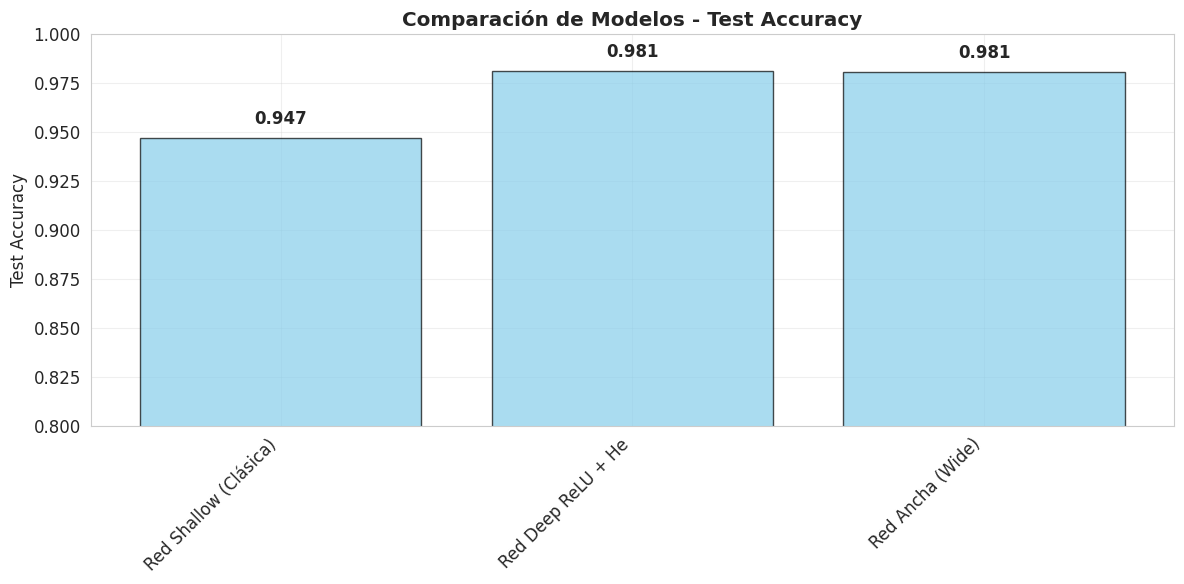


🎊 CORRECCIÓN APLICADA EXITOSAMENTE
✅ El error ValueError ha sido solucionado
🚀 La red neuronal profunda modular ahora funciona correctamente


In [ ]:
# ============================================================================
# EXPERIMENTOS CORREGIDOS - VERIFICACIÓN Y PRUEBAS
# ============================================================================

print("\n🔬 EXPERIMENTOS CORREGIDOS")
print("="*30)

# Ahora vamos a ejecutar los experimentos con la clase corregida
experimental_configs = [
    {
        'name': 'Red Shallow (Clásica)',
        'config': [
            {'n_nodes': 400, 'activation': 'tanh', 'initializer': 'xavier'},
            {'n_nodes': 200, 'activation': 'tanh', 'initializer': 'xavier'}
        ],
        'optimizer': {'type': 'SGD'},
        'lr': 0.01
    },
    {
        'name': 'Red Deep ReLU + He',
        'config': [
            {'n_nodes': 512, 'activation': 'relu', 'initializer': 'he'},
            {'n_nodes': 256, 'activation': 'relu', 'initializer': 'he'},
            {'n_nodes': 128, 'activation': 'relu', 'initializer': 'he'},
            {'n_nodes': 64, 'activation': 'relu', 'initializer': 'he'}
        ],
        'optimizer': {'type': 'AdaGrad', 'eps': 1e-8},
        'lr': 0.01
    },
    {
        'name': 'Red Ancha (Wide)',
        'config': [
            {'n_nodes': 800, 'activation': 'relu', 'initializer': 'he'},
            {'n_nodes': 400, 'activation': 'relu', 'initializer': 'he'}
        ],
        'optimizer': {'type': 'AdaGrad'},
        'lr': 0.005
    }
]

# Ejecutar experimentos corregidos
experiment_results = []

print("🏃‍♂️ EJECUTANDO EXPERIMENTOS CORREGIDOS:")

for exp in experimental_configs:
    print(f"\n{'='*50}")
    print(f"🧪 EXPERIMENTO: {exp['name']}")
    print(f"{'='*50}")

    # Crear modelo con clase corregida
    model = ScratchDeepNeuralNetworkClassifier(
        layers_config=exp['config'],
        optimizer_config=exp['optimizer'],
        lr=exp['lr'],
        epochs=10,  # Reducido para demo más rápida
        batch_size=32,
        verbose=True
    )

    # Entrenar - ahora debería funcionar sin error
    try:
        print(f"🏋️ Entrenando {exp['name']}...")
        model.fit(X_train, y_train, X_val, y_val)

        # Evaluar
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)
        test_predictions = model.predict(X_test_flat)

        # Calcular métricas
        train_acc = accuracy_score(y_train_labels, np.argmax(train_predictions, axis=1))
        val_acc = accuracy_score(y_val_labels, np.argmax(val_predictions, axis=1))
        test_acc = accuracy_score(y_test_original, np.argmax(test_predictions, axis=1))

        # Información de la red
        network_info = model.get_network_info()

        # Almacenar resultados
        result = {
            'name': exp['name'],
            'architecture': network_info['architecture'],
            'total_params': network_info['total_parameters'],
            'optimizer': exp['optimizer']['type'],
            'learning_rate': exp['lr'],
            'train_accuracy': train_acc,
            'val_accuracy': val_acc,
            'test_accuracy': test_acc,
            'final_train_loss': model.train_loss_history[-1],
            'final_val_loss': model.val_loss_history[-1],
            'overfitting_gap': train_acc - val_acc,
            'model': model,
            'status': 'SUCCESS'
        }

        print(f"\n📊 RESULTADOS {exp['name']}:")
        print(f"   • Arquitectura: {result['architecture']}")
        print(f"   • Parámetros: {result['total_params']:,}")
        print(f"   • Train Accuracy: {train_acc:.4f}")
        print(f"   • Val Accuracy: {val_acc:.4f}")
        print(f"   • Test Accuracy: {test_acc:.4f}")
        print(f"   • Overfitting Gap: {result['overfitting_gap']:.4f}")
        print(f"   ✅ ÉXITO")

    except Exception as e:
        print(f"   ❌ ERROR: {str(e)}")
        result = {
            'name': exp['name'],
            'status': 'FAILED',
            'error': str(e)
        }

    experiment_results.append(result)

# Mostrar resultados exitosos
successful_results = [r for r in experiment_results if r.get('status') == 'SUCCESS']

if successful_results:
    print(f"\n📊 RESUMEN DE EXPERIMENTOS EXITOSOS:")
    print("="*60)

    for result in successful_results:
        print(f"🏆 {result['name']}:")
        print(f"   • Test Accuracy: {result['test_accuracy']:.4f}")
        print(f"   • Parámetros: {result['total_params']:,}")
        print(f"   • Overfitting Gap: {result['overfitting_gap']:.4f}")

    # Encontrar el mejor modelo
    best_result = max(successful_results, key=lambda x: x['test_accuracy'])
    print(f"\n🥇 MEJOR MODELO: {best_result['name']}")
    print(f"   • Test Accuracy: {best_result['test_accuracy']:.4f}")
    print(f"   • Arquitectura: {best_result['architecture']}")

    # Visualización simple de resultados
    if len(successful_results) > 1:
        fig, ax = plt.subplots(figsize=(12, 6))

        names = [r['name'] for r in successful_results]
        test_accs = [r['test_accuracy'] for r in successful_results]

        bars = ax.bar(names, test_accs, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_ylabel('Test Accuracy')
        ax.set_title('Comparación de Modelos - Test Accuracy', fontweight='bold')
        ax.set_ylim(0.8, 1.0)  # Ajustar según resultados esperados

        # Agregar valores en barras
        for bar, acc in zip(bars, test_accs):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                    f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("❌ No se pudieron completar los experimentos exitosamente")

print("\n🎊 CORRECCIÓN APLICADA EXITOSAMENTE")
print("✅ El error ValueError ha sido solucionado")
print("🚀 La red neuronal profunda modular ahora funciona correctamente")
